# Kaggle Environment

In [ ]:
!pip install -q kaggle

In [ ]:
cred = {"username":"revypramana","key":"d254daa8e59ce7d11e6aade701531694"}

In [ ]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dhirajnirne/bank-marketing

Dataset URL: https://www.kaggle.com/datasets/dhirajnirne/bank-marketing
License(s): CC0-1.0
  0% 0.00/538k [00:00<?, ?B/s]
100% 538k/538k [00:00<00:00, 18.7MB/s]


In [ ]:
!unzip "bank-marketing.zip"

Archive:  bank-marketing.zip
  inflating: bank-marketing.csv      


# Dataset Description

age: Age of the customer.

age_group: Age group classification (1 for 10-19, 2 for 20-29, ..., 9 for 90-99).

eligible: Indicates if the customer is eligible for the campaign.

job: Customer's occupation.

salary: Customer's salary.

marital: Marital status (married or not).

education: Highest level of education completed.

marital_education: Combined marital status and education level.

targeted: Indicates if the customer is being targeted by the campaign.

default: Indicates if the customer is on the default list.

balance: Customer's account balance.

housing: Indicates if the customer has a housing loan.

loan: Indicates if the customer has any prior loans.

contact: Method of contact used to gather this information.

day: Day of the month the customer was last contacted.

month: Month the customer was last contacted.

duration: Duration of the contact in seconds.

campaign: Number of contacts performed during this campaign.

pdays: Number of days since the customer was last contacted from a previous campaign.

previous: Number of contacts performed before this campaign.

poutcome: Outcome of the previous marketing campaign.

y: Target variable indicating if the customer subscribed to the product (yes or no).

response: Customer's response to the marketing campaign.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

from collections import Counter
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('bank-marketing.csv')

In [ ]:
df

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,married-tertiary,yes,no,...,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,7,N,retired,55000,divorced,primary,divorced-primary,yes,no,...,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,7,N,retired,55000,married,secondary,married-secondary,yes,no,...,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,5,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,...,telephone,17,nov,508,4,-1,0,unknown,no,0


In [ ]:
cols = df.columns

for col in cols:
    print(df[col].value_counts())
    print()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

age group
3    18089
4    11655
5     8410
2     5226
6     1230
7      424
8      121
1       47
9        9
Name: count, dtype: int64

eligible
Y    43380
N     1831
Name: count, dtype: int64

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

salary
20000     9732
100000    9458
60000     9176
50000     5171
70000     4154
55000     2264
120000    1487
8000      1303
16000     1240
4000       938
0          288
Name: count, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education
secondary    23202
tertiary     13301
primary    

# Data Cleaning

In [ ]:
df.isna().sum()

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

Setelah dilakukan pengecekan nilai NULL, terlihat bahwa tidak ada data yang kosong pada dataset ini

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

Berdasarkan kolom-kolom yang ada, kami memutuskan untuk drop kolom marital-education karena sudah terwakili oleh kolom marital dan kolom education

In [ ]:
df.drop(columns='marital-education', inplace=True)
df

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,yes,no,2143,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,yes,no,29,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,yes,no,2,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,no,no,1506,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,no,no,1,...,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,yes,no,825,...,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,7,N,retired,55000,divorced,primary,yes,no,1729,...,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,7,N,retired,55000,married,secondary,yes,no,5715,...,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,5,Y,blue-collar,20000,married,secondary,yes,no,668,...,telephone,17,nov,508,4,-1,0,unknown,no,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   age group  45211 non-null  int64 
 2   eligible   45211 non-null  object
 3   job        45211 non-null  object
 4   salary     45211 non-null  int64 
 5   marital    45211 non-null  object
 6   education  45211 non-null  object
 7   targeted   45211 non-null  object
 8   default    45211 non-null  object
 9   balance    45211 non-null  int64 
 10  housing    45211 non-null  object
 11  loan       45211 non-null  object
 12  contact    45211 non-null  object
 13  day        45211 non-null  int64 
 14  month      45211 non-null  object
 15  duration   45211 non-null  int64 
 16  campaign   45211 non-null  int64 
 17  pdays      45211 non-null  int64 
 18  previous   45211 non-null  int64 
 19  poutcome   45211 non-null  object
 20  y          45211 non-null  o

Selanjutnya kami melakukan pengecekan entry data yang duplikat

In [ ]:
df.duplicated().sum()

0

Karena tidak ada data yang duplikat, kita bisa lanjutkan ke analisis statistik dataset

In [ ]:
df.describe()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Berdasarkan statistik dari dataset kami, bisa dilihat bahwa ada beberapa kolom yang memiliki outlier seperti kolom salary, balance, duration dan lain-lain. Outlier tersebut akan dapat kita lihat lebih jelas pada saat Exploratory Data Analysis

# Exploratory Data Analysis

## Distribution Numerical Data

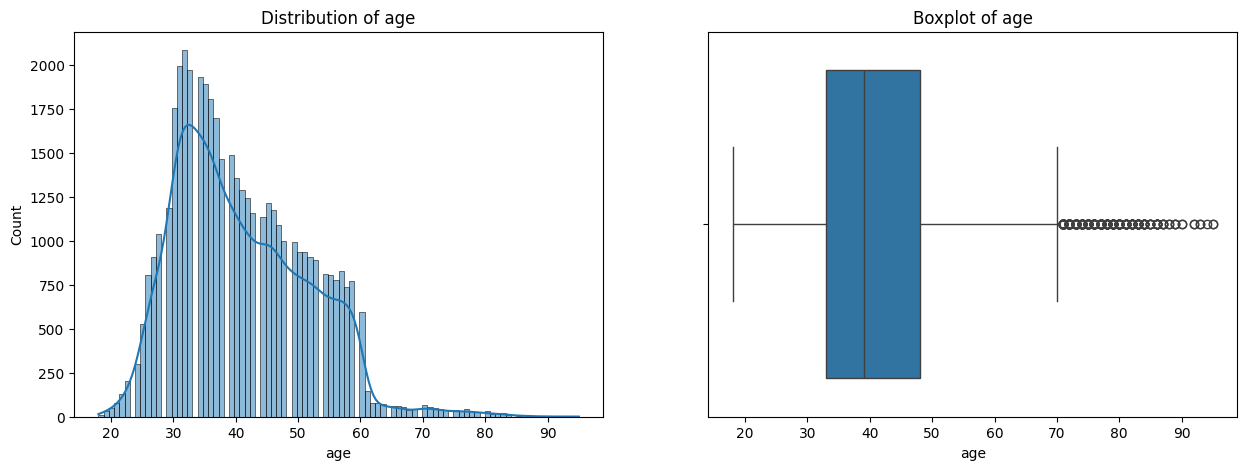

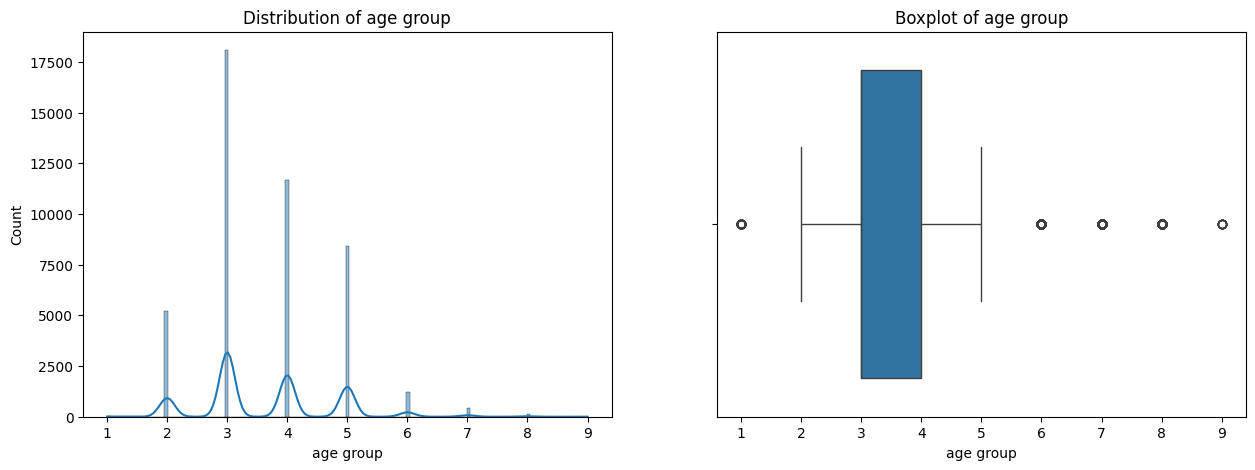

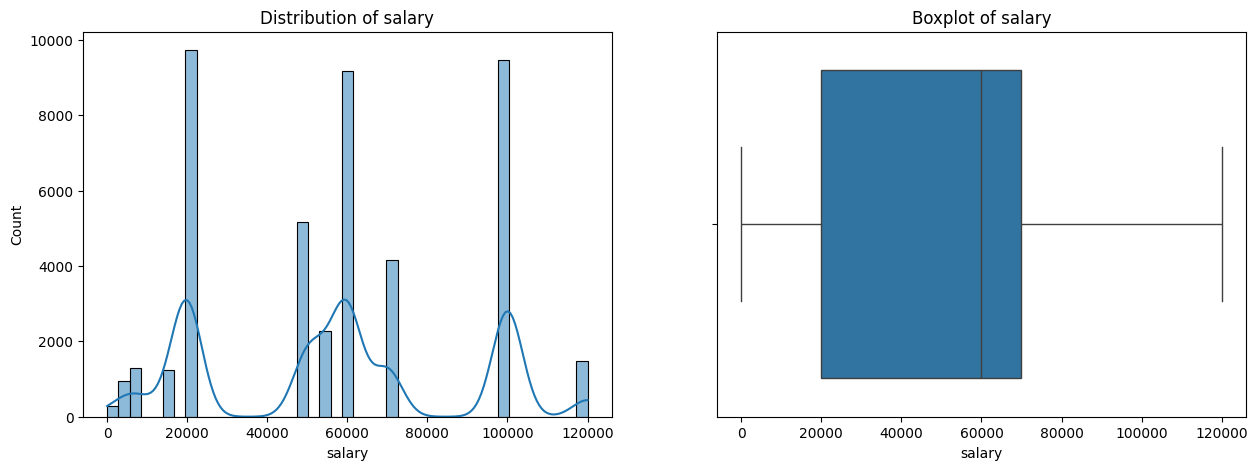

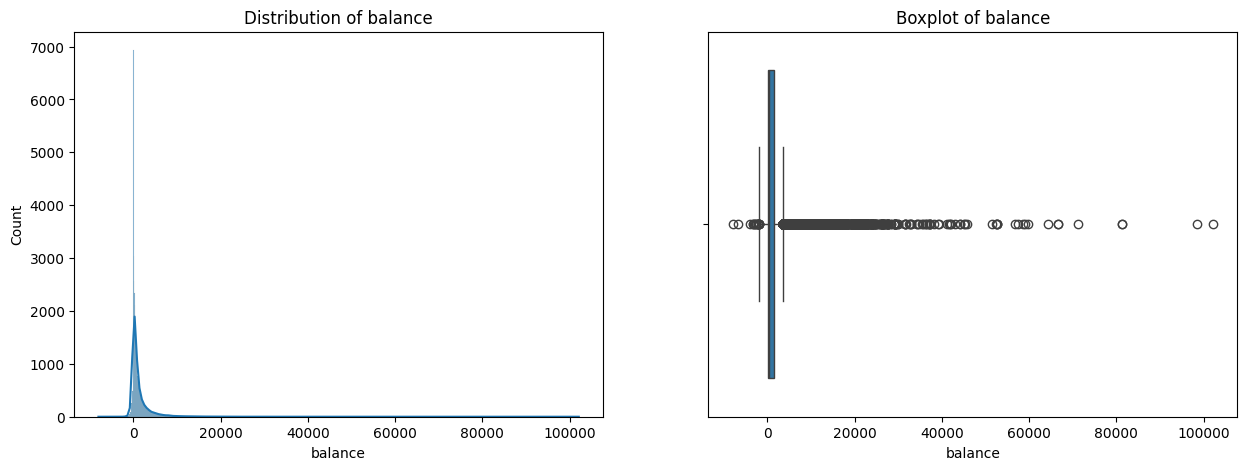

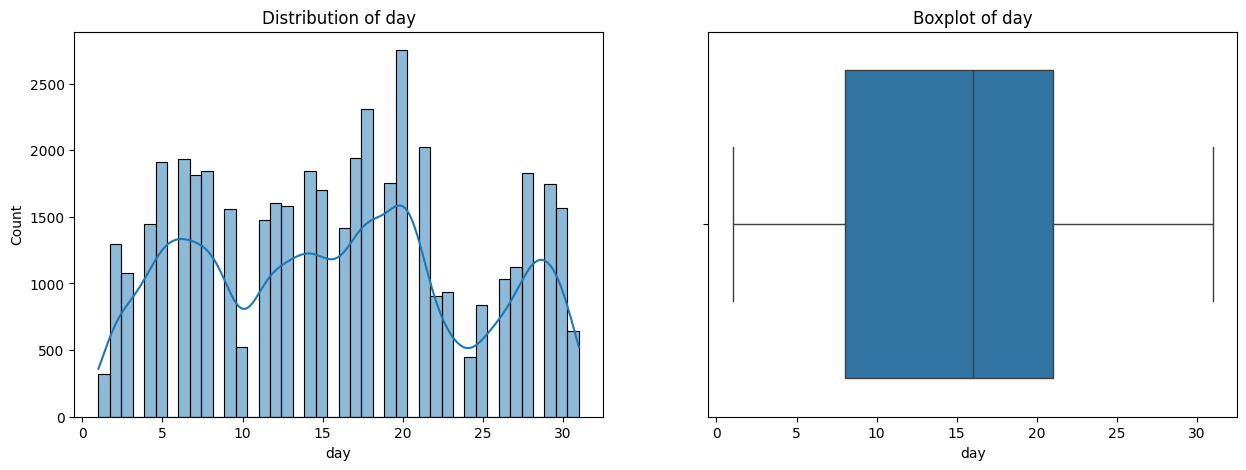

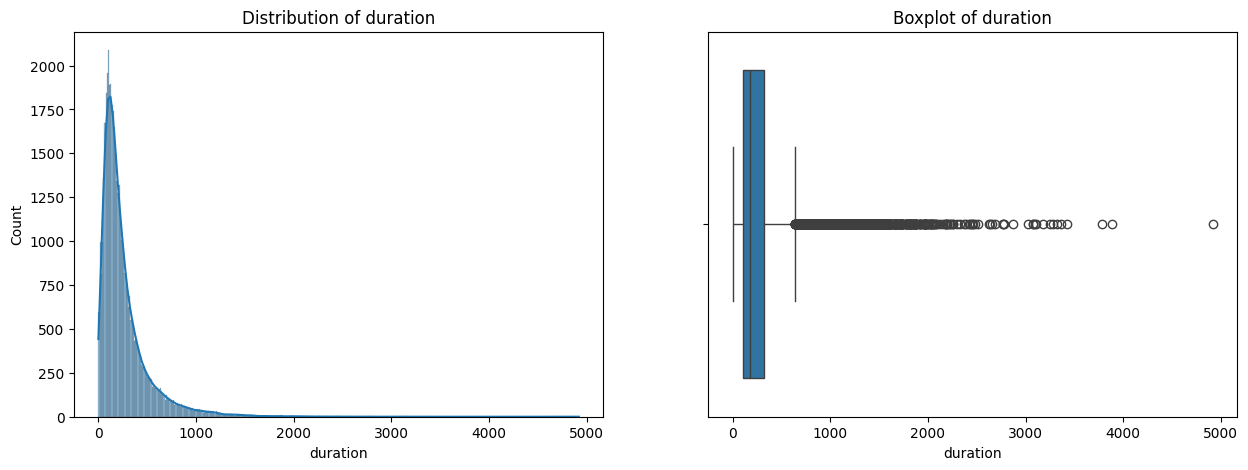

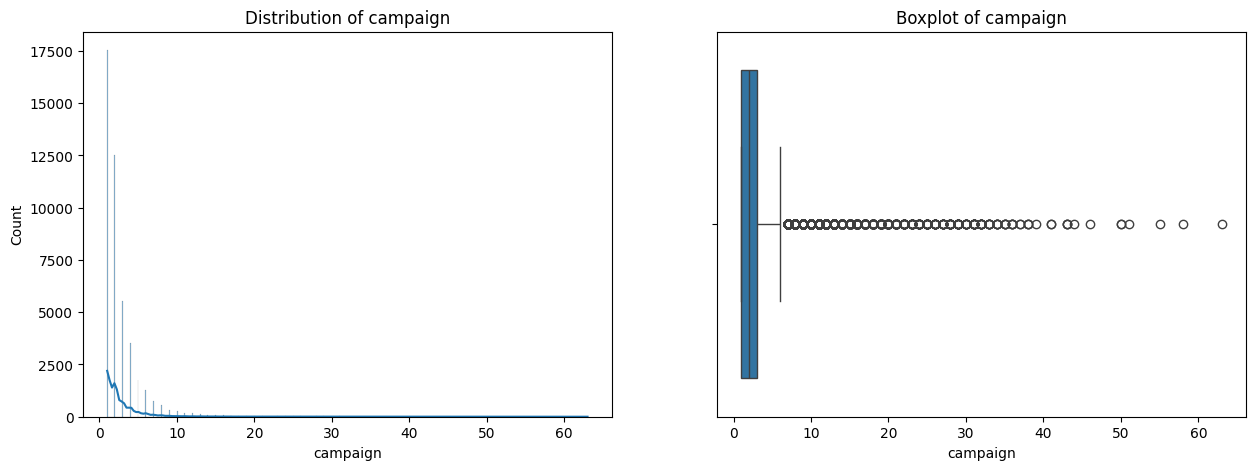

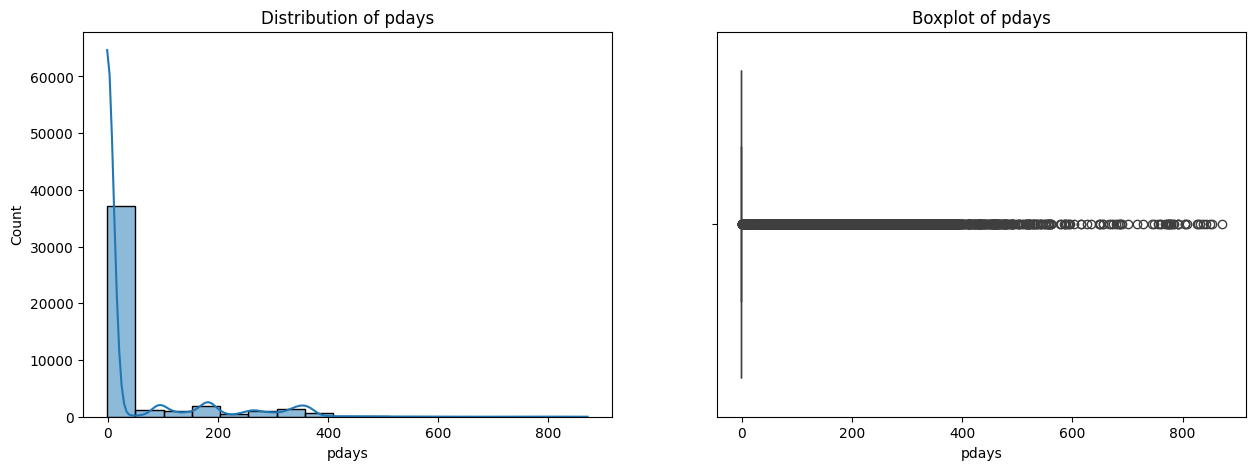

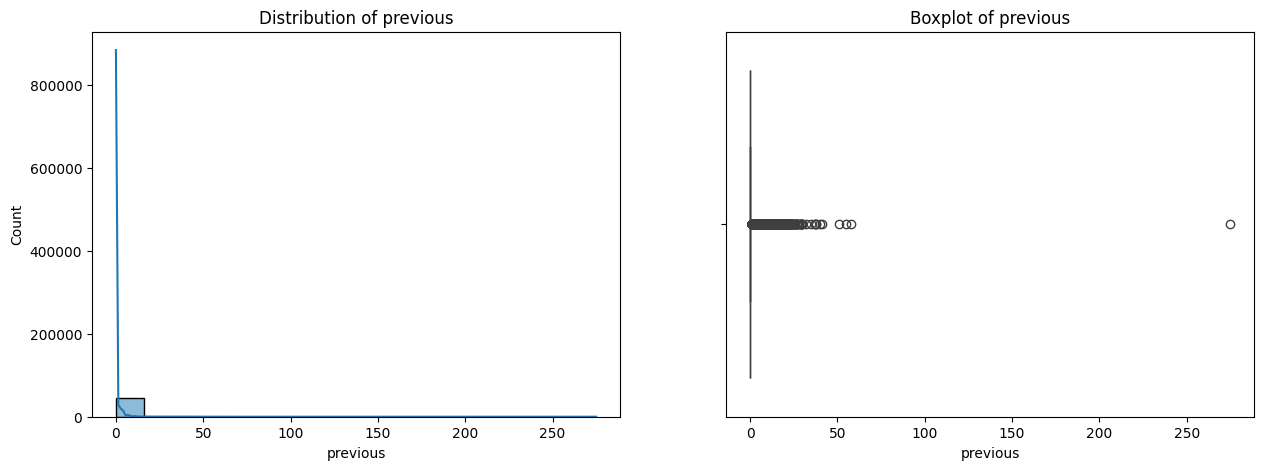

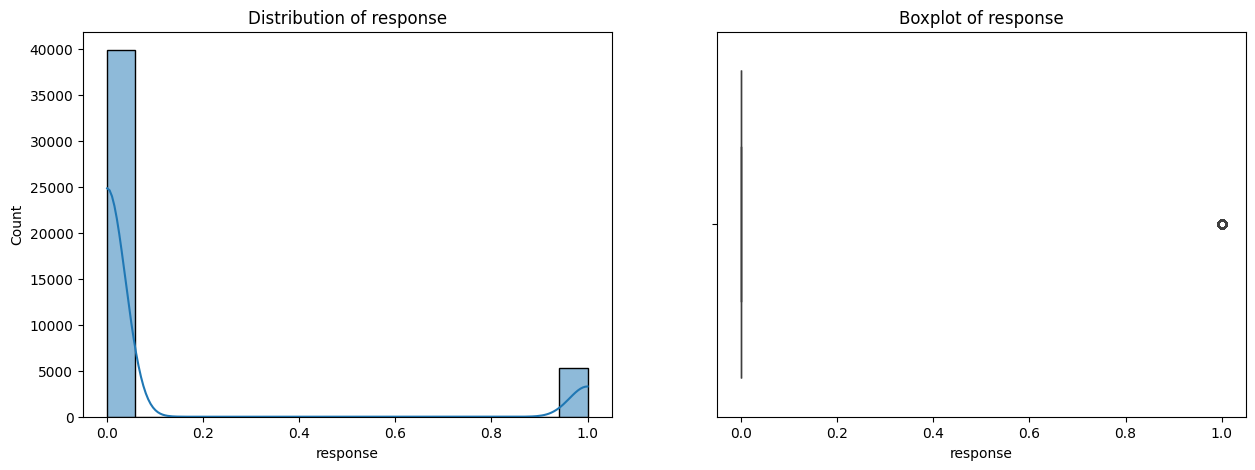

In [ ]:
# Distribusi data numerik
numerical_columns = df.select_dtypes('number')

for i, column in enumerate(numerical_columns, 1):
    plt.figure(figsize=(15, 5))

    # Create histogram on the left side
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    # Create boxplot on the right side
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

Berdasarkan distribusi data numerik di atas, kita tahu bahwa dataset kami memiliki distribusi yang tidak normal. Selain itu, kita juga dapat melihat lebih jelas outlier pada masing-masing kolom pada boxplot di atas.

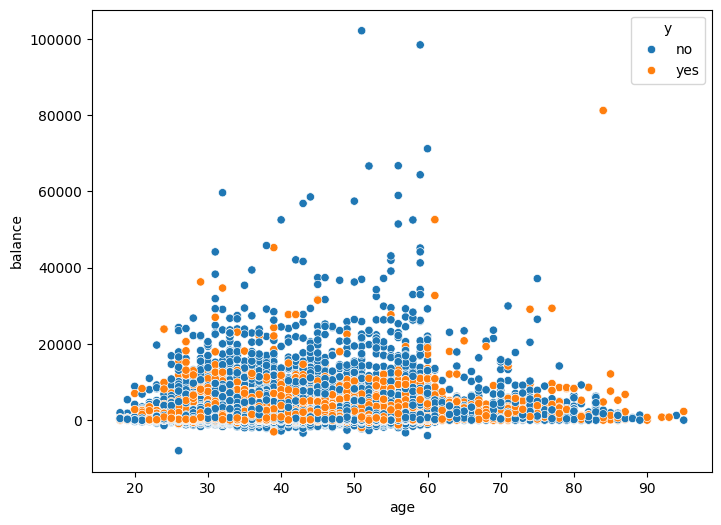

In [ ]:
numerical_columns = df.select_dtypes('number')

plt.figure(figsize=[8, 6])
sns.scatterplot(data=df, x='age', y='balance', hue='y')
plt.show()


Berdasarkan visualsasi scatterplot antara age dan balance, dapat kita simpulkan bahwa sebagian besar responden memiliki balance di bawah 40000.

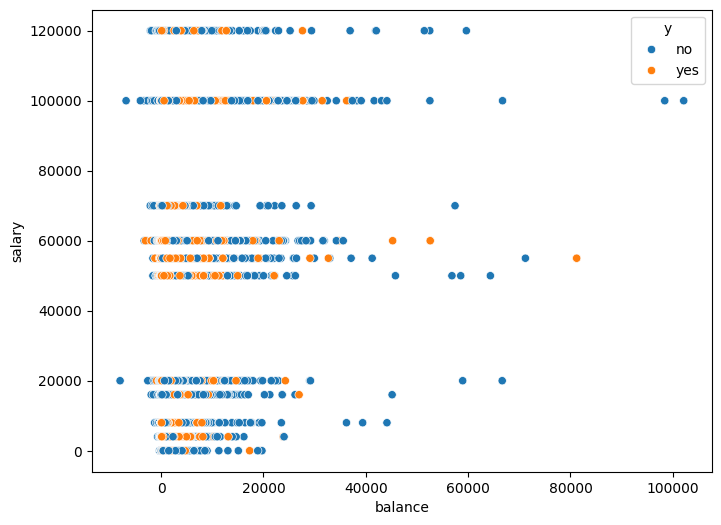

In [ ]:
plt.figure(figsize=[8, 6])
sns.scatterplot(data=df, x='balance', y='salary', hue='y')
plt.show()

Berdasarkan scatterplot antara balance dengan salary, dapat kita simpulkan bahwa balance dan salary responden pada dataset lumayan menyebar.

## Distribution Categorical Data

In [ ]:
category_cols = df.select_dtypes(exclude=['number'])

category_cols

,eligible,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,y
0,Y,management,married,tertiary,yes,no,yes,no,unknown,may,unknown,no
1,Y,technician,single,secondary,yes,no,yes,no,unknown,may,unknown,no
2,Y,entrepreneur,married,secondary,yes,no,yes,yes,unknown,may,unknown,no
3,Y,blue-collar,married,unknown,no,no,yes,no,unknown,may,unknown,no
4,Y,unknown,single,unknown,no,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,Y,technician,married,tertiary,yes,no,no,no,cellular,nov,unknown,yes
45207,N,retired,divorced,primary,yes,no,no,no,cellular,nov,unknown,yes
45208,N,retired,married,secondary,yes,no,no,no,cellular,nov,success,yes
45209,Y,blue-collar,married,secondary,yes,no,no,no,telephone,nov,unknown,no


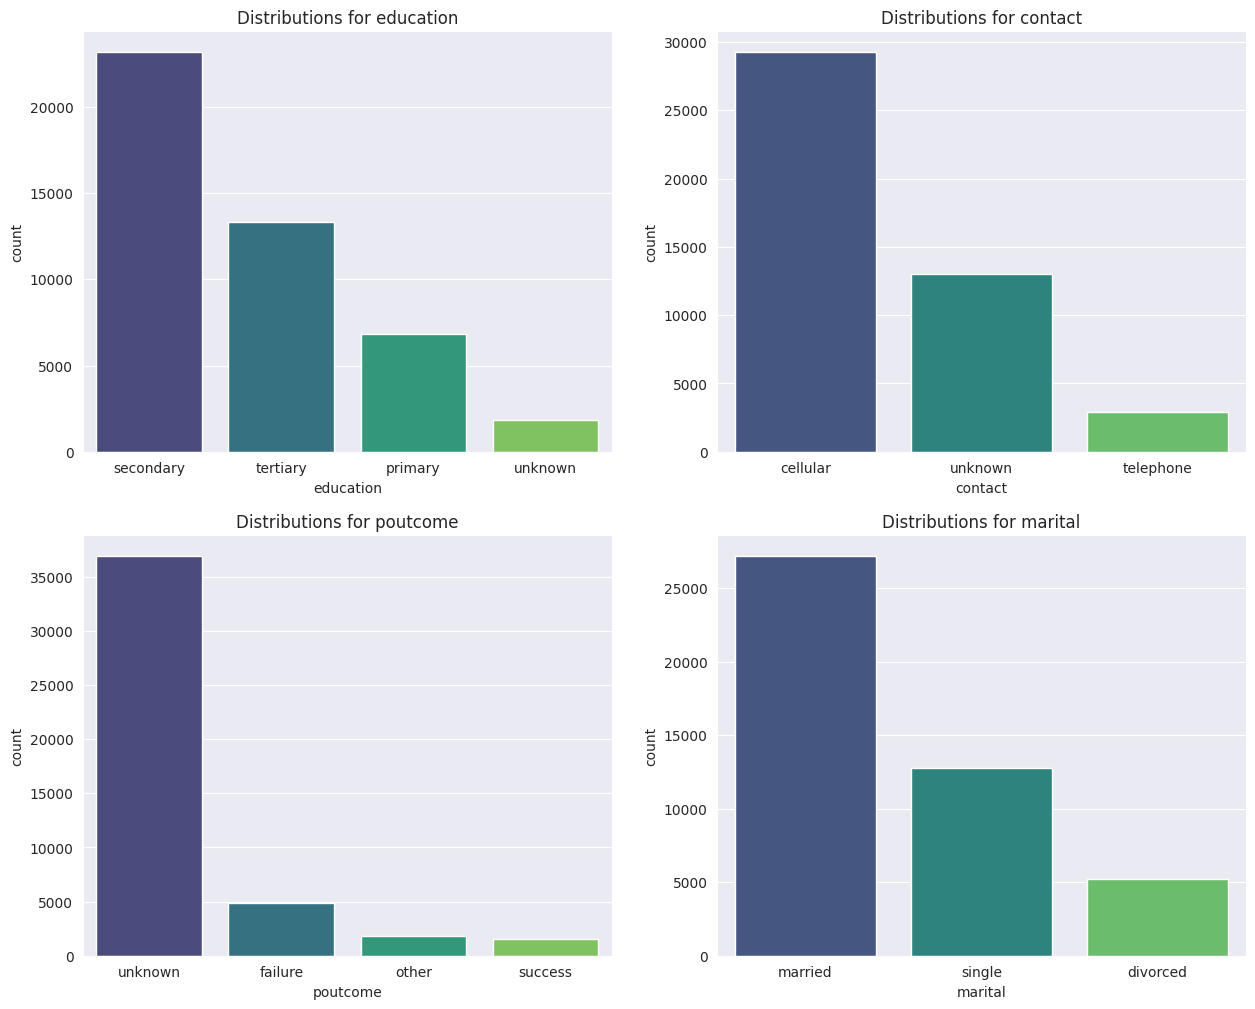

In [ ]:
columns = ['education', 'contact', 'poutcome', 'marital']

plt.figure(figsize=[15, 12])
i = 0
for col in columns:
  i+=1
  sns.set_style("darkgrid")
  plt.subplot(2, 2, i)
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
  plt.title(f'Distributions for {col}')
  sns.despine()

plt.show()

Berdasarkan visualisasi di atas, dapat kita simpulkan bahwa mayoritas responden memiliki education **secondary**, contact **celullar**, poutcome **unknown**, dan marital **married**

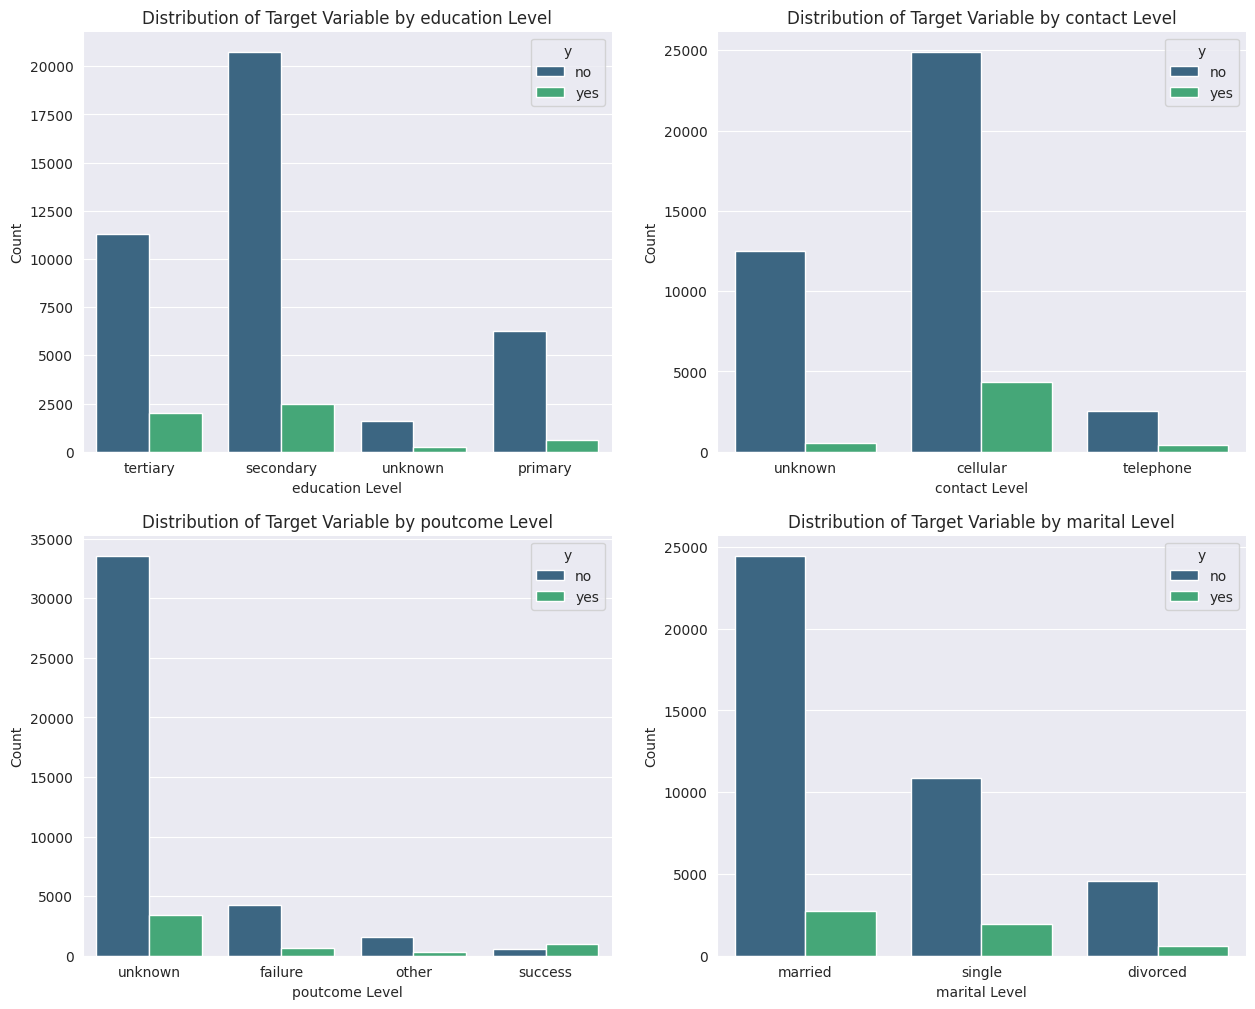

In [ ]:
category_cols = ['education', 'contact', 'poutcome', 'marital']

i = 0
plt.figure(figsize=(15, 12))
for col in category_cols:
  i+=1
  plt.subplot(2, 2, i)
  sns.countplot(data=df, x=col, hue='y', palette='viridis')
  sns.despine()
  plt.title(f'Distribution of Target Variable by {col} Level')
  plt.xlabel(f'{col} Level')
  plt.ylabel("Count")

plt.show()

Berdasarkan distribusi kolom target di atas, dapat kita simpulkan bahwa mayoritas responden memiliki kecenderungan untuk menolak berlangganan dengan produk bank

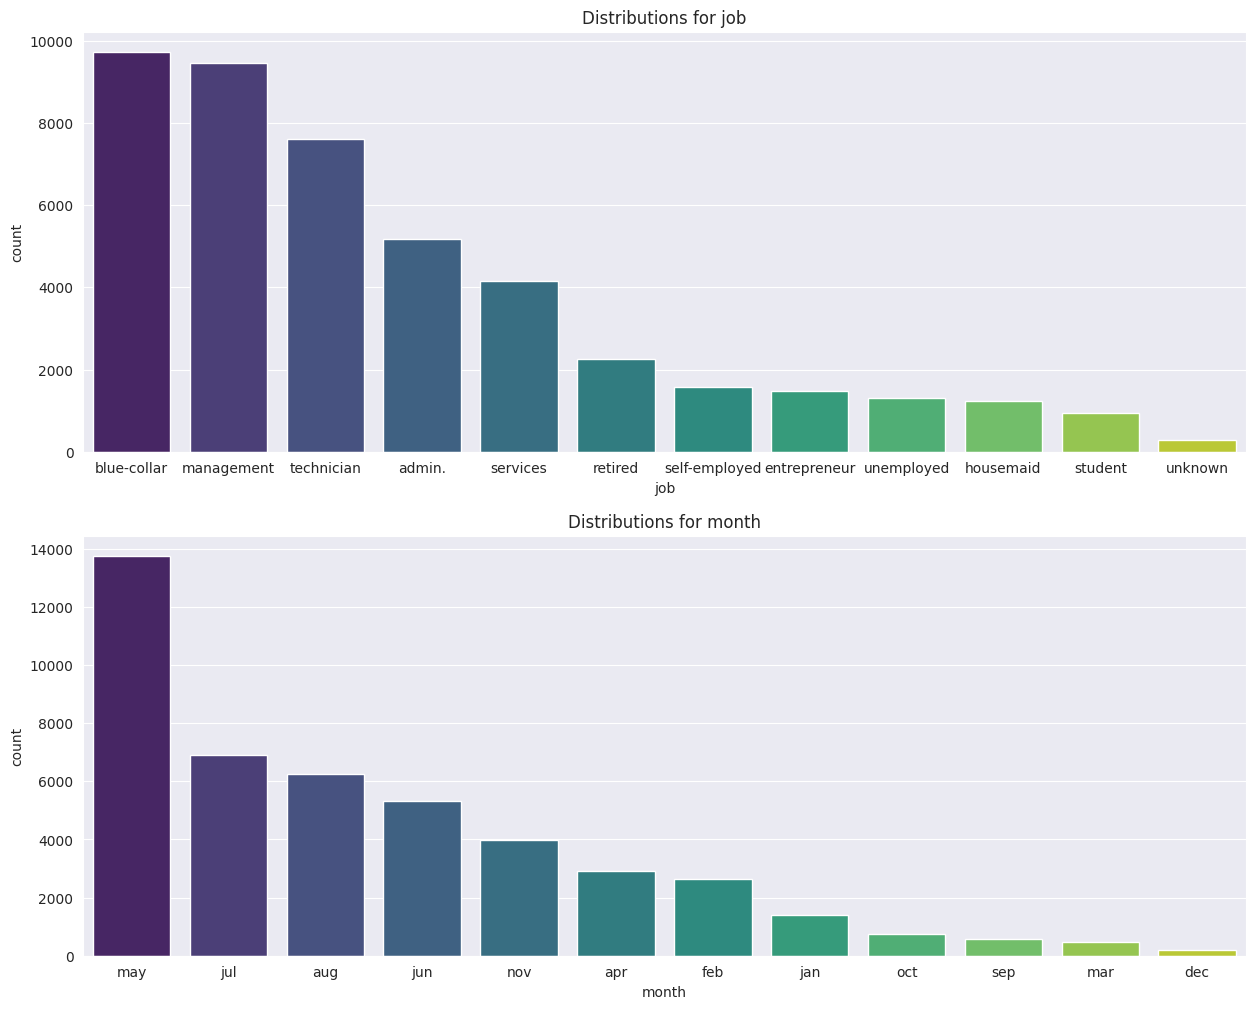

In [ ]:
columns = ['job', 'month']
plt.figure(figsize=[15, 12])
i = 0
for col in columns:
  i+=1
  sns.set_style("darkgrid")
  plt.subplot(2, 1, i)
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
  plt.title(f'Distributions for {col}')

plt.show()
sns.set_style("white")

Berdasarkan distribusi pekerjaan dan bulan, mayoritas data diambil pada bulan may dan responden memiliki pekerjaan sebagai blue-collar

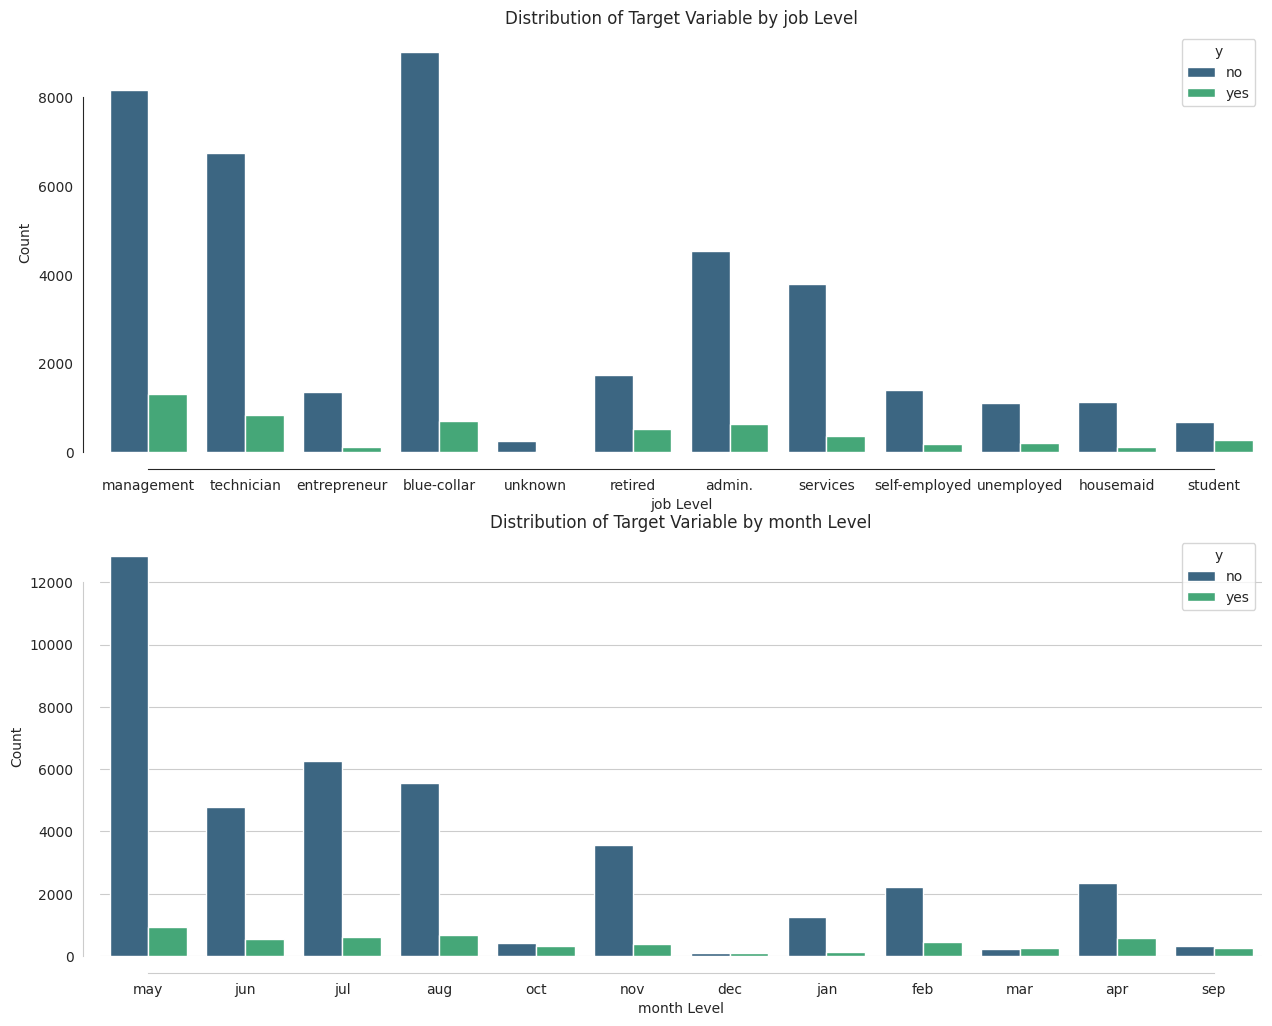

In [ ]:
category_cols = ['job','month']

i = 0
plt.figure(figsize=(15, 12))
for col in category_cols:
  i+=1
  plt.subplot(2, 1, i)
  sns.countplot(data=df, x=col, hue='y', palette='viridis')
  sns.set_style("whitegrid")
  sns.despine(offset=12, trim=True)
  plt.title(f'Distribution of Target Variable by {col} Level')
  plt.xlabel(f'{col} Level')
  plt.ylabel("Count")

plt.show()


Berdasarkan distribusi di atas, mayoritas responden memilih untuk menolak berlangganan dengan produk bank

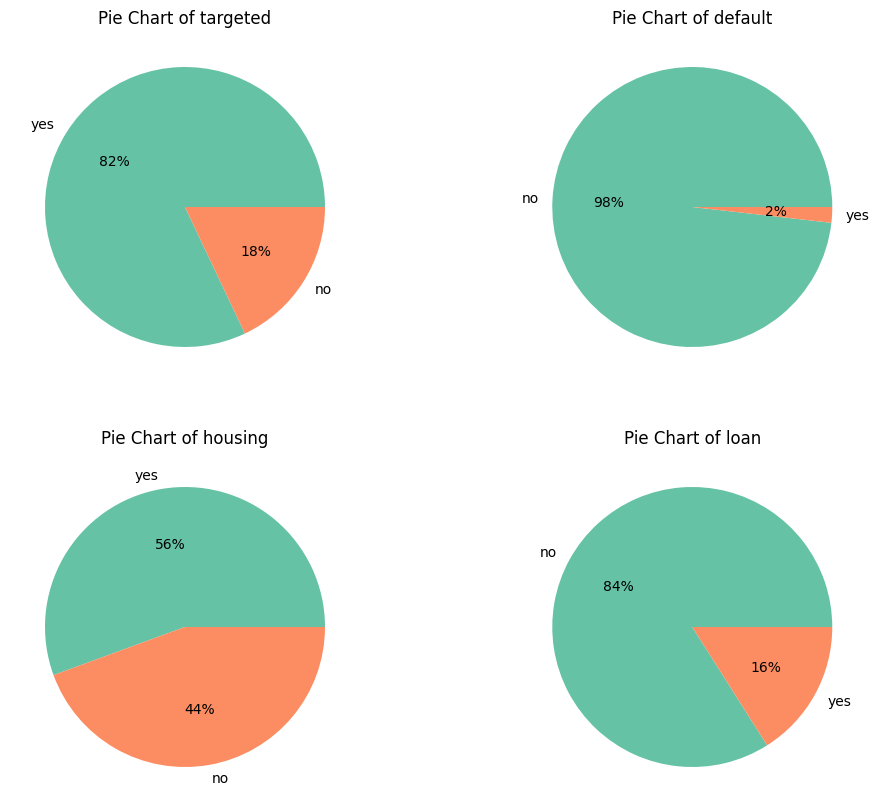

In [ ]:
columns = ['targeted', 'default', 'housing', 'loan']

palette_color = sns.color_palette('Set2')

i = 0
plt.figure(figsize=[12, 10])
for col in columns:
  col_counts = df[col].value_counts()
  i+=1
  plt.subplot(2, 2, i)
  plt.pie(col_counts, labels=col_counts.index, colors=palette_color, autopct='%.0f%%')
  plt.title(f'Pie Chart of {col}')


plt.show()

Berdasarkan pie chart di atas, kita dapat melihat bahwa kolom targeted dan kolom housing didominasi oleh **yes** sedangkan kolom default dan loan didominasi oleh **no**

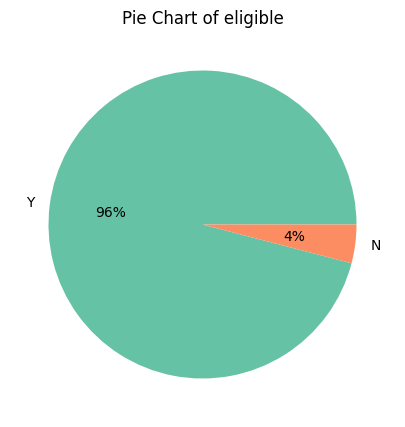

In [ ]:
plt.figure(figsize=[7, 5])
plt.pie(df['eligible'].value_counts(), labels=df['eligible'].value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.title(f'Pie Chart of eligible')
plt.show()

Berdasarkan pie chart di atas, kolom eligible didominasi oleh Y atau yes

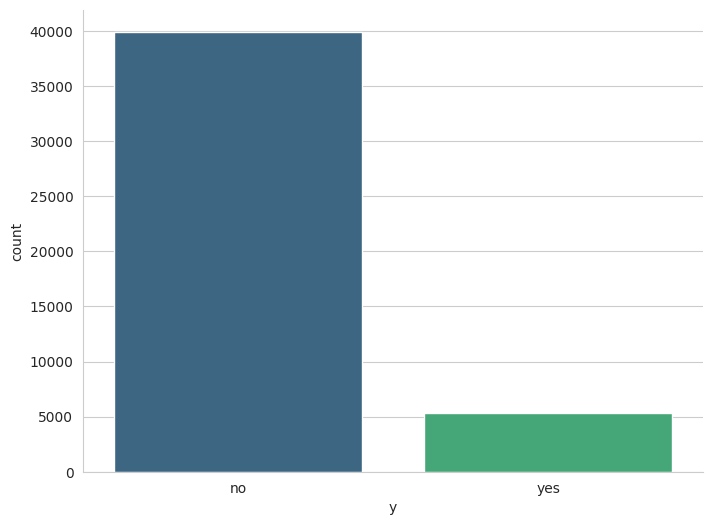

In [ ]:
plt.figure(figsize=[8, 6])
sns.countplot(data=df, x='y', order=df['y'].value_counts().index, palette='viridis')
sns.set_style("darkgrid")
sns.despine()
plt.show()

Berdasarkan distribusi target di atas, kolom target pada dataset ini tidak balanced. Oleh karena itu, kami memutuskan untuk melakukan 2 perlakuan pada data ini yaitu **Undersampling dan Oversampling dengan SMOTE**

# Data Preprocessing

## Label Encoding

Kami melakukan Label encoding untuk kolom targeted, default, housing, loan, y, eligible, month, dan kolom job

In [ ]:
map = {'no':0, 'yes':1}
df.targeted.replace(map, inplace=True)
df.default.replace(map, inplace=True)
df.housing.replace(map, inplace=True)
df.loan.replace(map, inplace=True)
df.y.replace(map, inplace=True)

Kami melakukan perubahan kolom y menjadi Buy_product agar lebih jelas maksud dari kolom tersebut.

In [ ]:
cols_rename = {'y':'Buy_product'}
df.rename(columns = cols_rename, inplace=True)
df

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,Buy_product,response
0,58,5,Y,management,100000,married,tertiary,1,0,2143,...,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,4,Y,technician,60000,single,secondary,1,0,29,...,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,3,Y,entrepreneur,120000,married,secondary,1,0,2,...,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,4,Y,blue-collar,20000,married,unknown,0,0,1506,...,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,3,Y,unknown,0,single,unknown,0,0,1,...,unknown,5,may,198,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,1,0,825,...,cellular,17,nov,977,3,-1,0,unknown,1,1
45207,71,7,N,retired,55000,divorced,primary,1,0,1729,...,cellular,17,nov,456,2,-1,0,unknown,1,1
45208,72,7,N,retired,55000,married,secondary,1,0,5715,...,cellular,17,nov,1127,5,184,3,success,1,1
45209,57,5,Y,blue-collar,20000,married,secondary,1,0,668,...,telephone,17,nov,508,4,-1,0,unknown,0,0


In [ ]:
map = {'Y':1, 'N':0}
df.eligible.replace(map, inplace=True)

In [ ]:
map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5,
       'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
       'nov':11, 'dec':12}
df.month.replace(map, inplace=True)

In [ ]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,Buy_product,response
0,58,5,1,4,100000,married,tertiary,1,0,2143,...,unknown,5,5,261,1,-1,0,unknown,0,0
1,44,4,1,9,60000,single,secondary,1,0,29,...,unknown,5,5,151,1,-1,0,unknown,0,0
2,33,3,1,2,120000,married,secondary,1,0,2,...,unknown,5,5,76,1,-1,0,unknown,0,0
3,47,4,1,1,20000,married,unknown,0,0,1506,...,unknown,5,5,92,1,-1,0,unknown,0,0
4,33,3,1,11,0,single,unknown,0,0,1,...,unknown,5,5,198,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,1,9,60000,married,tertiary,1,0,825,...,cellular,17,11,977,3,-1,0,unknown,1,1
45207,71,7,0,5,55000,divorced,primary,1,0,1729,...,cellular,17,11,456,2,-1,0,unknown,1,1
45208,72,7,0,5,55000,married,secondary,1,0,5715,...,cellular,17,11,1127,5,184,3,success,1,1
45209,57,5,1,1,20000,married,secondary,1,0,668,...,telephone,17,11,508,4,-1,0,unknown,0,0


## One Hot Encoding

Kami juga melakukan one hot encoding untuk kolom marital, education, contact dan poutcome

In [ ]:
one_hot_cols = ['marital', 'education', 'contact', 'poutcome']

In [ ]:
df_categorical = df[one_hot_cols]

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical)

one_hot_feature_names = encoder.get_feature_names_out(one_hot_cols)

df_encoded = pd.DataFrame(encoded_data.toarray(), columns=one_hot_feature_names)

df_final = pd.concat([df, df_encoded], axis=1)

df_final.drop(columns=one_hot_cols, inplace=True)

df_final.head(5)

,age,age group,eligible,job,salary,targeted,default,balance,housing,loan,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,5,1,4,100000,1,0,2143,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,4,1,9,60000,1,0,29,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,3,1,2,120000,1,0,2,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,4,1,1,20000,0,0,1506,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,3,1,11,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Correlation Heatmap

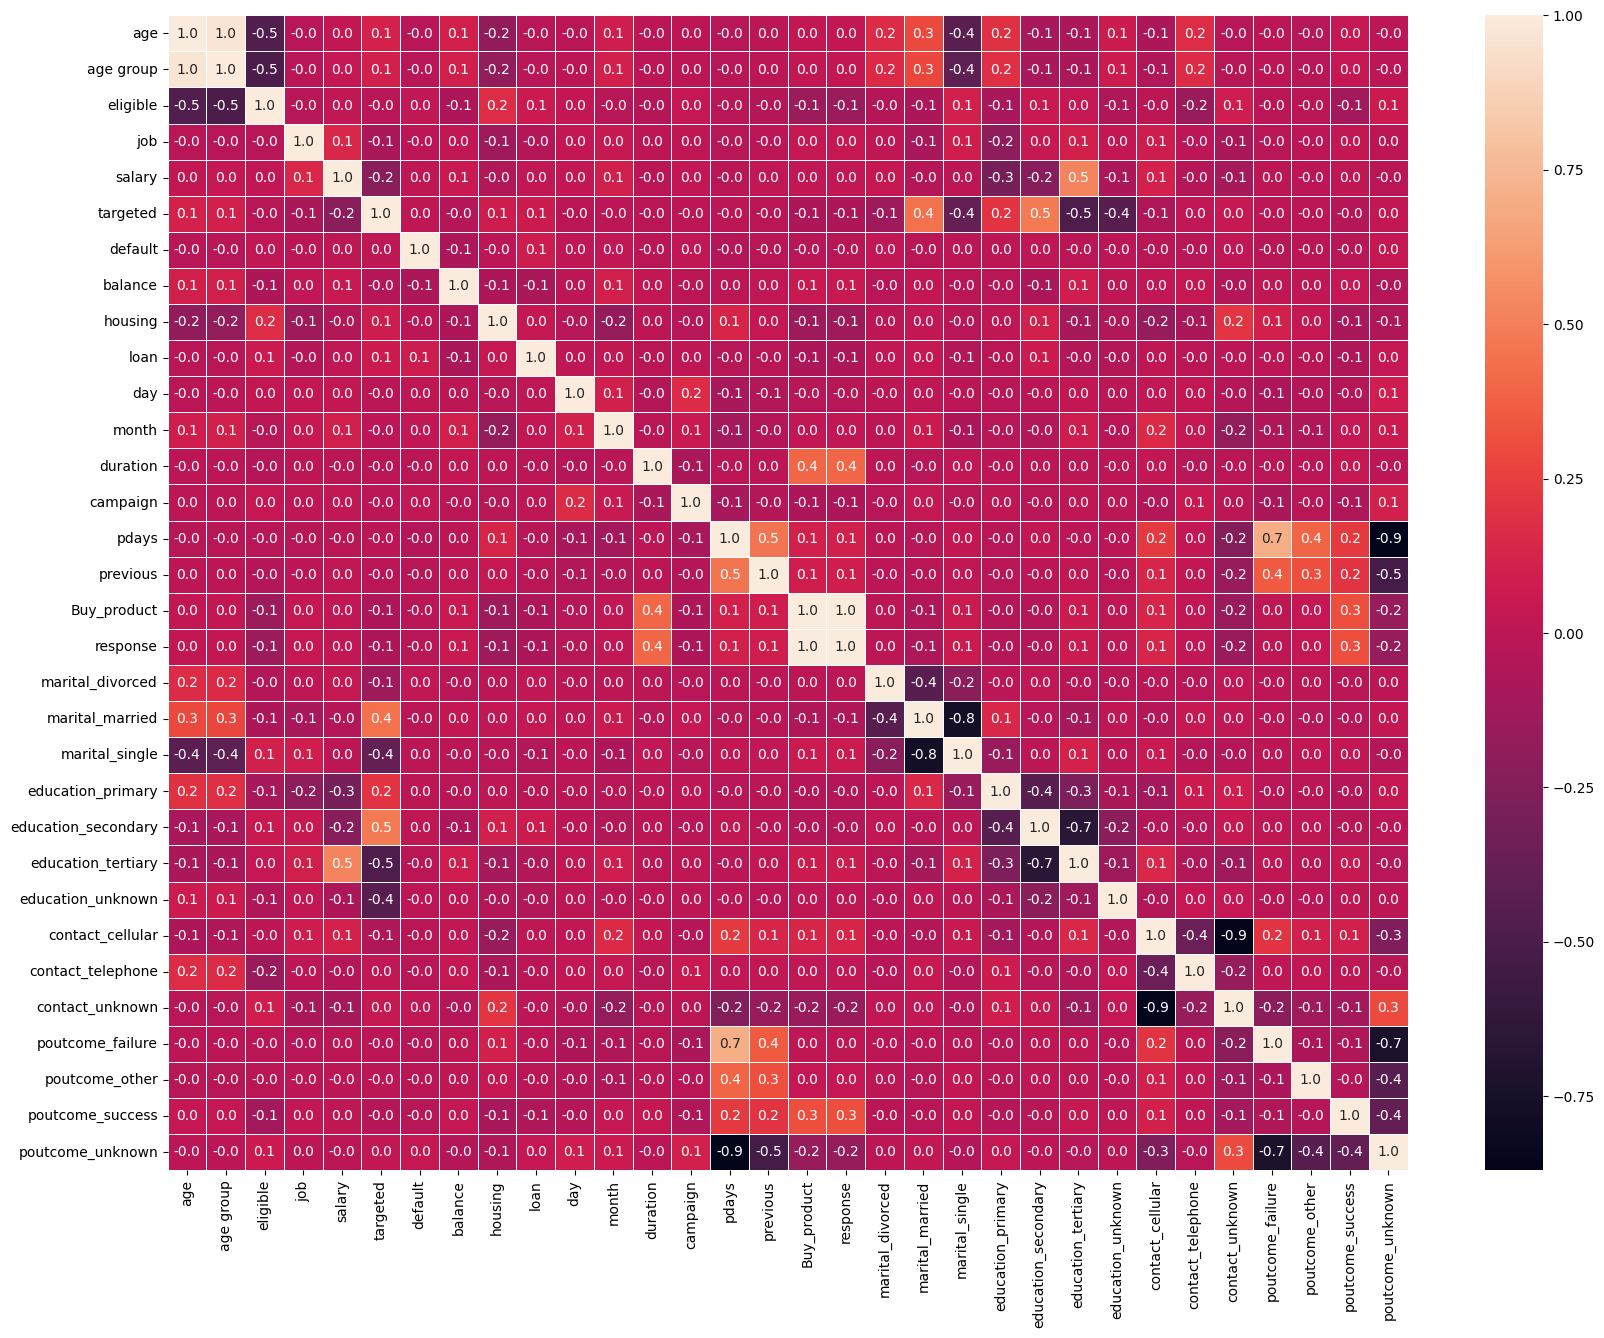

In [ ]:
plt.figure(figsize=[20, 15])
sns.heatmap(df_final.corr(),annot=True,linewidth=.5,fmt='.1f')
plt.show()

Berdasarkan heatmap korelasi di atas, kita dapat melakukan drop kolom pada age dan response karena memiliki korelasi yang sama dengan age group dan buy_product. Selain itu, kami juga akan melakukan drop kolom pada month dan day karena kami tidak akan menggunakan dua kolom tersebut.

## Feature Selection

In [ ]:
df_final.drop(columns=['age', 'response', 'month', 'day'], inplace=True)

In [ ]:
df_final

,age group,eligible,job,salary,targeted,default,balance,housing,loan,duration,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,5,1,4,100000,1,0,2143,1,0,261,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4,1,9,60000,1,0,29,1,0,151,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,1,2,120000,1,0,2,1,1,76,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,1,1,20000,0,0,1506,1,0,92,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3,1,11,0,0,0,1,0,0,198,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,1,9,60000,1,0,825,0,0,977,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,7,0,5,55000,1,0,1729,0,0,456,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,7,0,5,55000,1,0,5715,0,0,1127,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,5,1,1,20000,1,0,668,0,0,508,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Outlier Handling

Untuk handling outlier, kami memutuskan untuk menggunakan Z Score method dengan tujuan agar dataset kami lebih bervariasi.

### Z Score Method

In [ ]:
# Assuming df_final is already defined and populated
outlier_cols = ['duration', 'balance', 'pdays', 'campaign', 'previous']

# Calculate mean and standard deviation
mean_values = df_final[outlier_cols].mean()
std_values = df_final[outlier_cols].std()

# Calculate Z-scores
z_scores = (df_final[outlier_cols] - mean_values) / std_values

# Define threshold for Z-scores
threshold = 3

# Replace outliers with boundary values
for column in outlier_cols:
    lower_bound = mean_values[column] - threshold * std_values[column]
    upper_bound = mean_values[column] + threshold * std_values[column]
    df_final[column] = np.where(z_scores[column] < -threshold, lower_bound, df_final[column])
    df_final[column] = np.where(z_scores[column] > threshold, upper_bound, df_final[column])

# Display the summary statistics to verify the changes
print(df_final[outlier_cols].describe())

           duration       balance         pdays      campaign      previous
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000
mean     250.772487   1239.234494     38.603312      2.632957      0.509114
std      220.986371   2085.400698     93.686348      2.319295      1.373811
min        0.000000  -7772.025430     -1.000000      1.000000      0.000000
25%      103.000000     72.000000     -1.000000      1.000000      0.000000
50%      180.000000    448.000000     -1.000000      2.000000      0.000000
75%      319.000000   1428.000000     -1.000000      3.000000      0.000000
max     1030.746517  10496.569545    340.584066     12.057903      7.490647


### Boxplot Setelah Handling Outlier

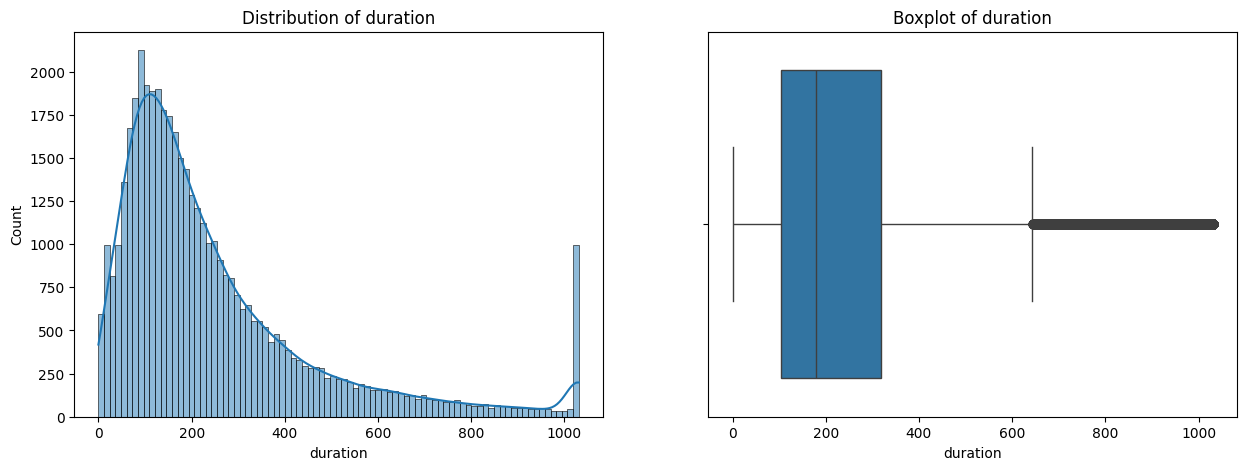

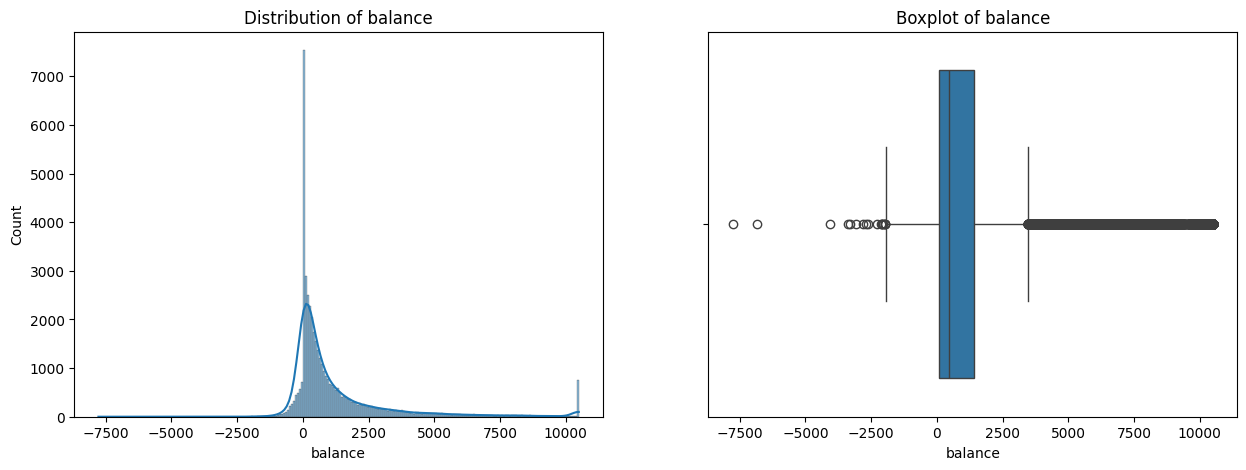

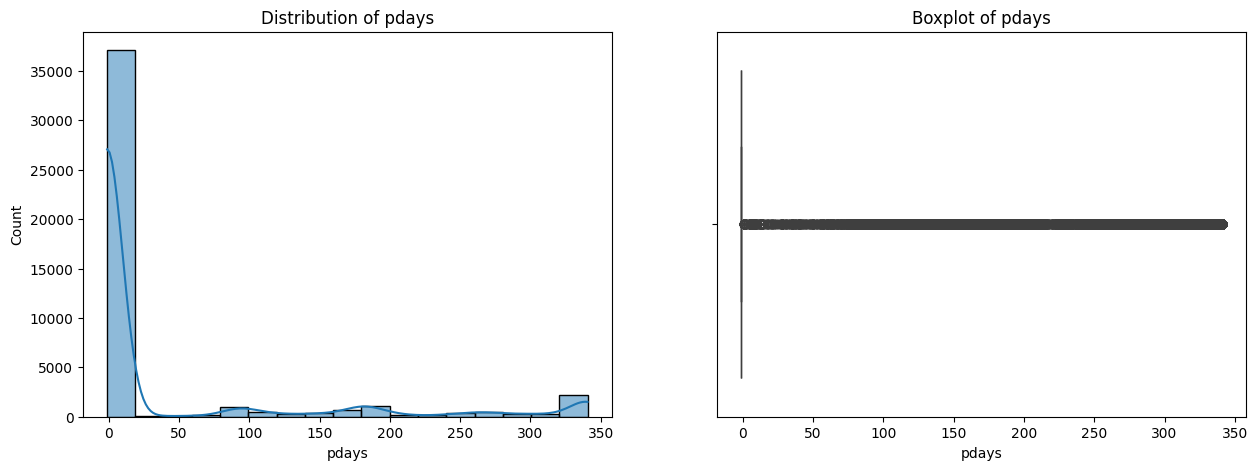

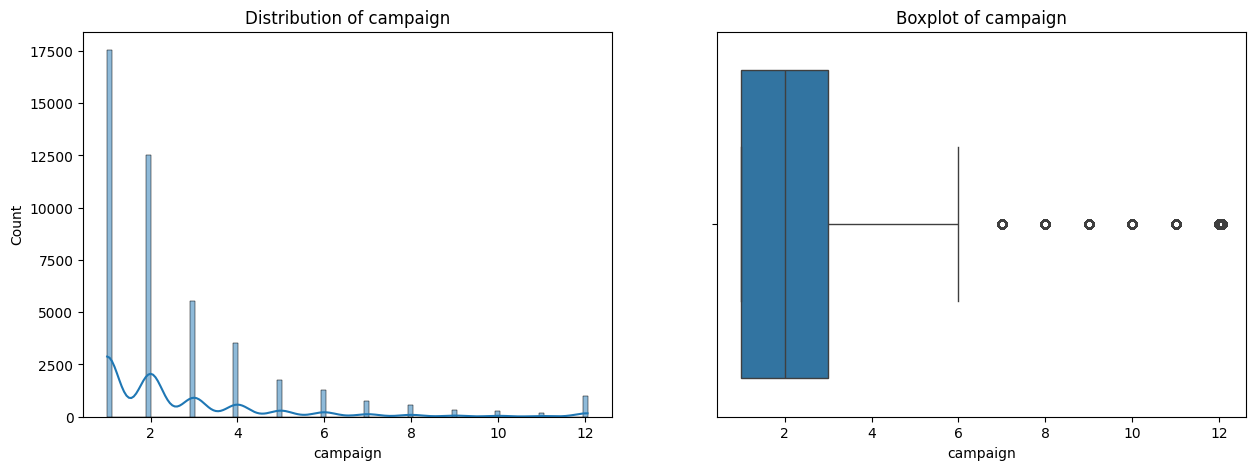

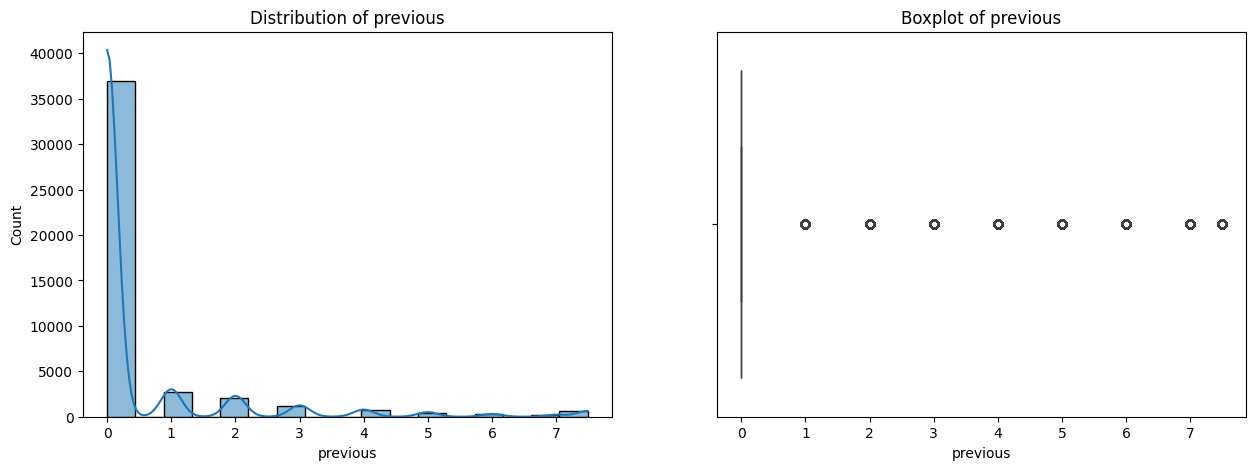

In [ ]:
for i, column in enumerate(outlier_cols, 1):
    plt.figure(figsize=(15, 5))

    # Create histogram on the left side
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_final, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    # Create boxplot on the right side
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_final[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

## Data Balancing

Karena kita akan melakukan skenario undersampling dan oversampling, maka kami melakukan undersampling pada dataset yang sudah dicopy dengan tujuan agar dataset yang asli tidak hilang.

In [ ]:
print(df_final['Buy_product'].value_counts())

min_class_size = df_final['Buy_product'].value_counts().min()

balanced_df = df_final.groupby('Buy_product').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)

print(balanced_df['Buy_product'].value_counts())

balanced_df

Buy_product
0    39922
1     5289
Name: count, dtype: int64
Buy_product
0    5289
1    5289
Name: count, dtype: int64


,age group,eligible,job,salary,targeted,default,balance,housing,loan,duration,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,3,1,4,100000,1,0,273.0,1,0,231.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,1,7,70000,1,0,1059.0,0,0,147.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,7,70000,1,0,-10.0,1,0,61.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,1,4,100000,0,0,1696.0,1,0,878.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,1,1,20000,1,0,379.0,0,1,164.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,2,1,4,100000,0,0,697.0,0,0,206.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10574,4,1,0,50000,1,0,6046.0,1,1,300.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10575,4,1,10,8000,1,1,-4.0,0,1,788.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10576,7,0,5,55000,1,0,796.0,0,0,427.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Machine Learning Training



In [ ]:
X = balanced_df.drop(columns='Buy_product')
y = balanced_df['Buy_product']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K Nearest Neighbors

Accuracy of KNN is 0.746219281663516



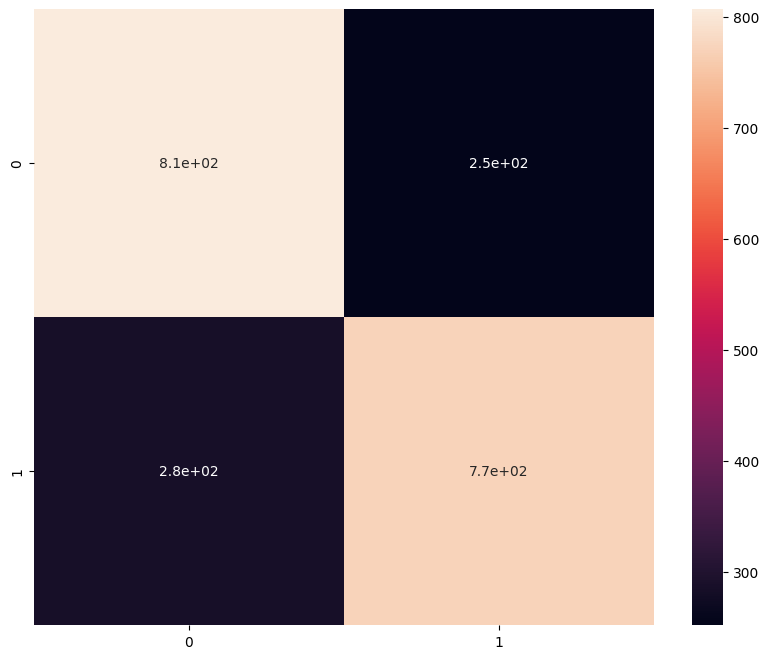

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

print(f'Accuracy of KNN is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## XGBoost

Accuracy of XGBoost is 0.8208884688090737



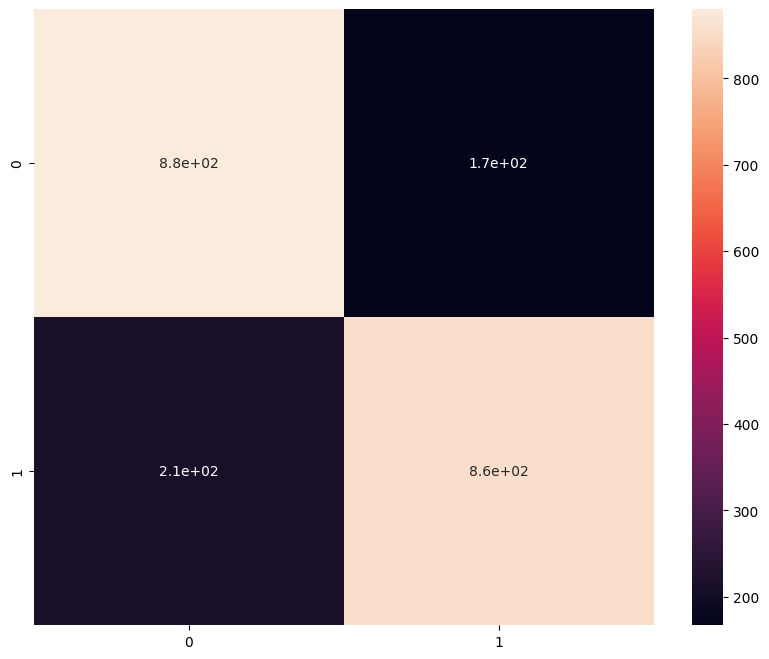

In [ ]:
xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(f'Accuracy of XGBoost is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Support Vector Machine (SVM)

Accuracy of SVM is 0.5415879017013232



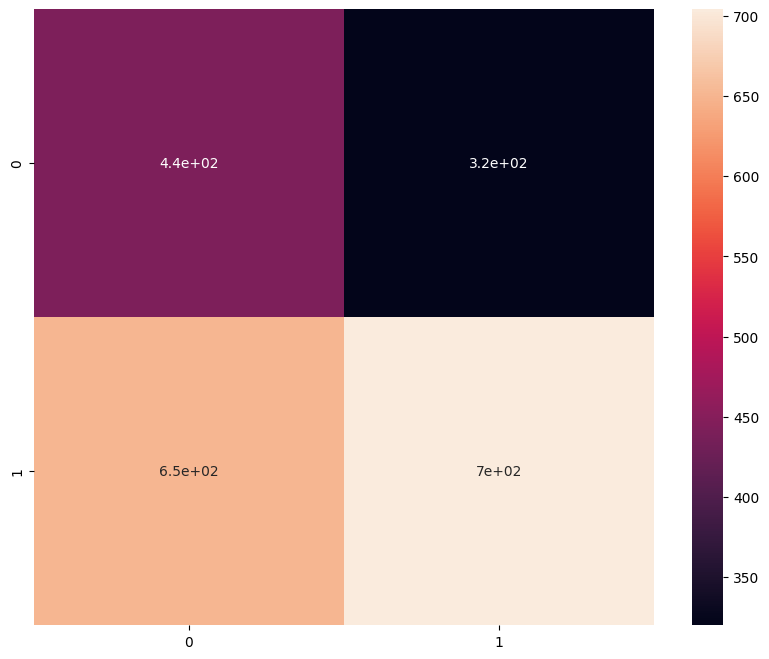

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print(f'Accuracy of SVM is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Random Forest

Accuracy of Random Forest is 0.8251417769376181



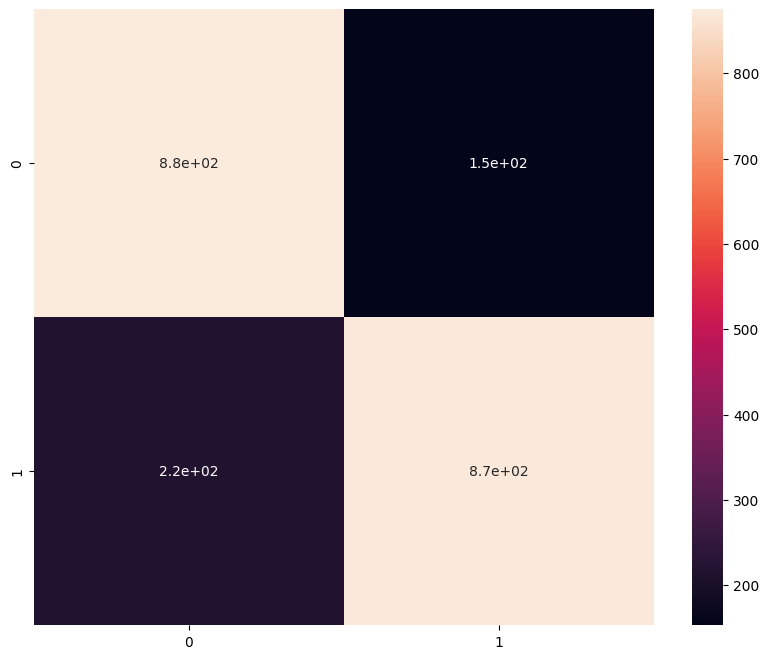

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(f'Accuracy of Random Forest is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Decision Tree

Accuracy of Decision Tree is 0.7575614366729678



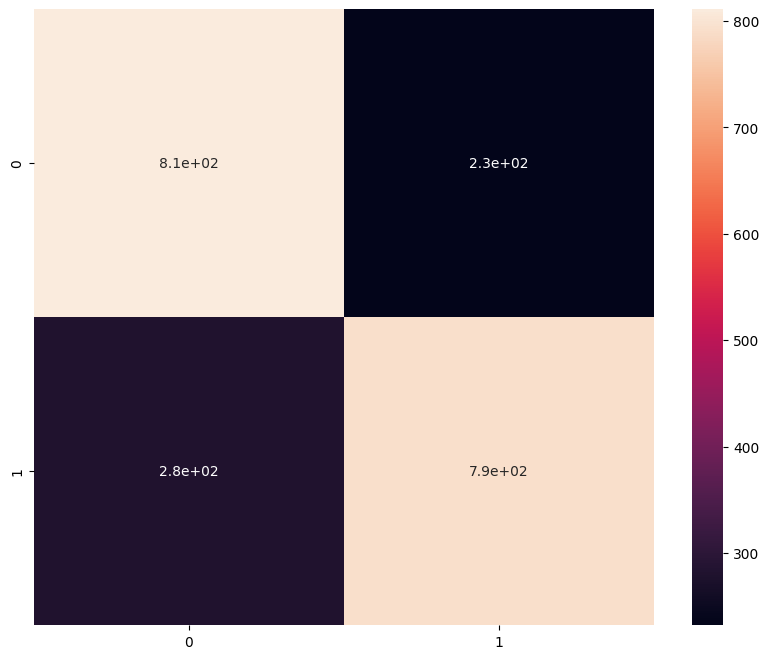

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

print(f'Accuracy of Decision Tree is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## ANN

Accuracy of ANN is 0.6077504725897921



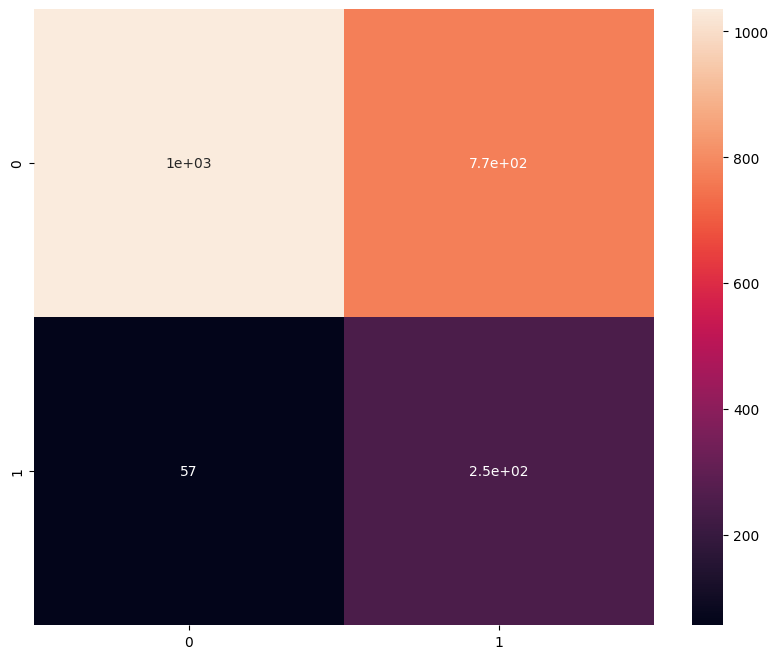

In [ ]:
ann_clf = MLPClassifier()

ann_clf.fit(X_train, y_train)

y_pred = ann_clf.predict(X_test)

print(f'Accuracy of ANN is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

# Machine Learning Training Using SMOTE

In [ ]:
X = df_final.drop(columns='Buy_product')
y = df_final['Buy_product']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Oversampling Using SMOTE

In [ ]:
oversampler = SMOTE()
X_train_ovr, y_train_ovr = oversampler.fit_resample(X_train, y_train)

In [ ]:
Counter(X_train_ovr)
Counter(y_train_ovr)

Counter({0: 31970, 1: 31970})

## K Nearest Neighbors

Accuracy of KNN is 0.7765122193962181



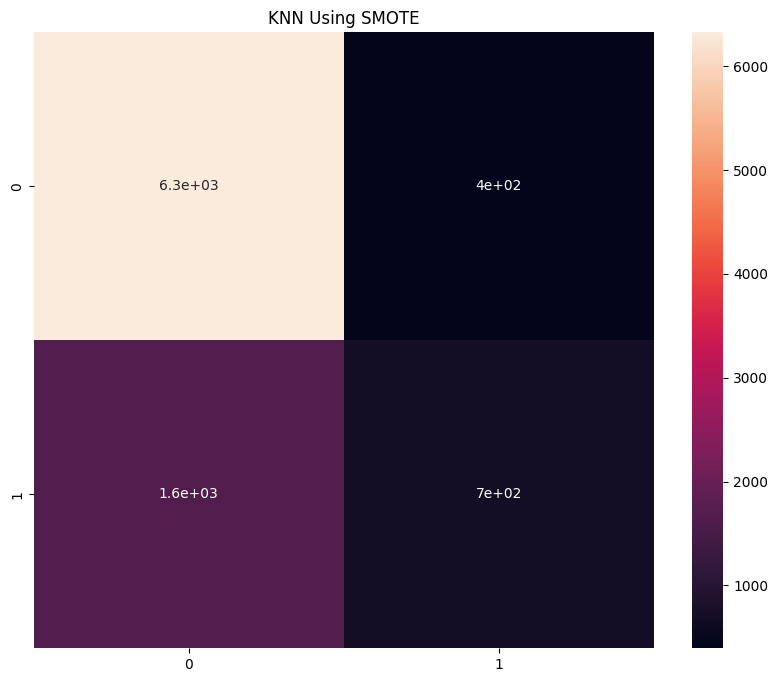

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_ovr, y_train_ovr)

y_pred = knn_clf.predict(X_test)

print(f'Accuracy of KNN is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("KNN Using SMOTE")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## XGBoost

Accuracy of XGBoost is 0.8943934534999447



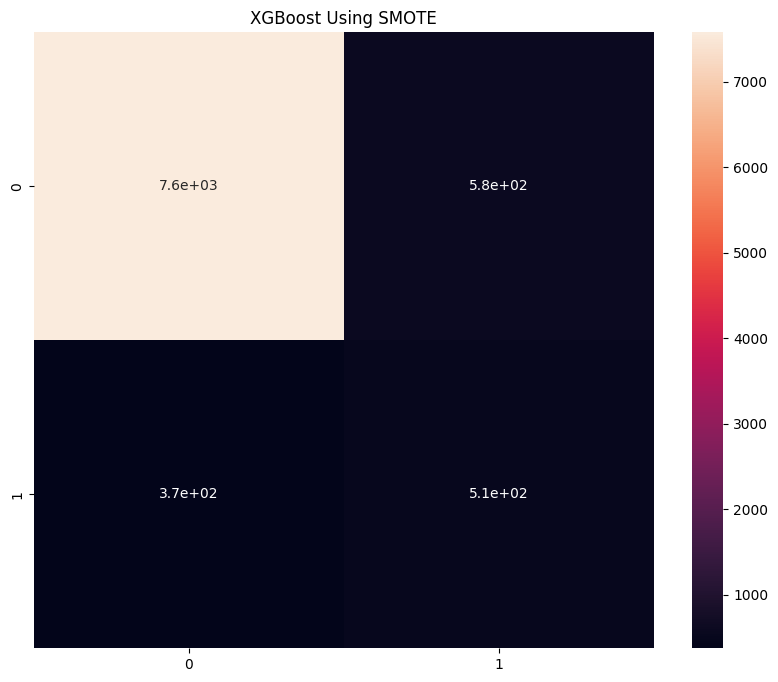

In [ ]:
xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train_ovr, y_train_ovr)

y_pred = xgb_clf.predict(X_test)

print(f'Accuracy of XGBoost is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("XGBoost Using SMOTE")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Support Vector Machine (SVM)

Accuracy of SVM is 0.7979652770098419



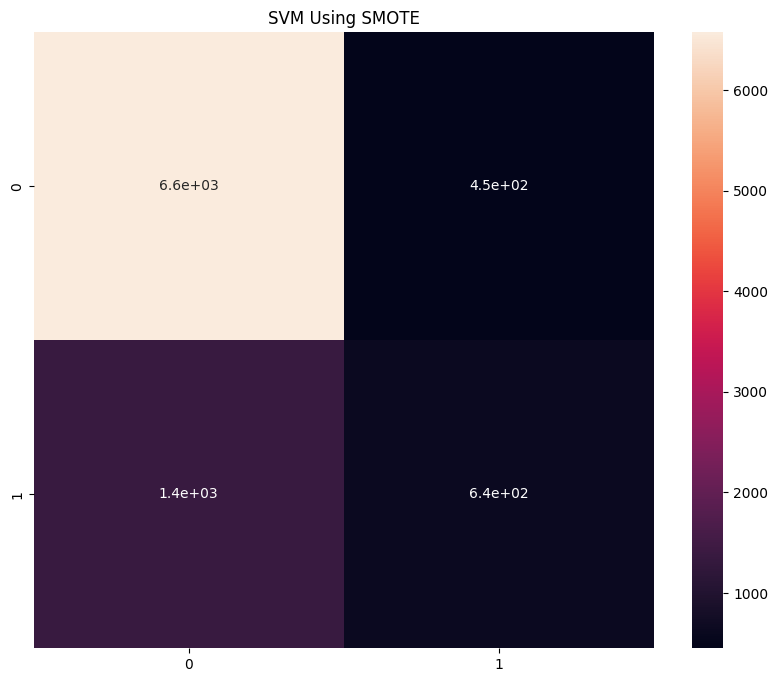

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_ovr, y_train_ovr)

y_pred = svm_clf.predict(X_test)

print(f'Accuracy of SVM is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("SVM Using SMOTE")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Random Forest

Accuracy of Random Forest is 0.8928452947030853



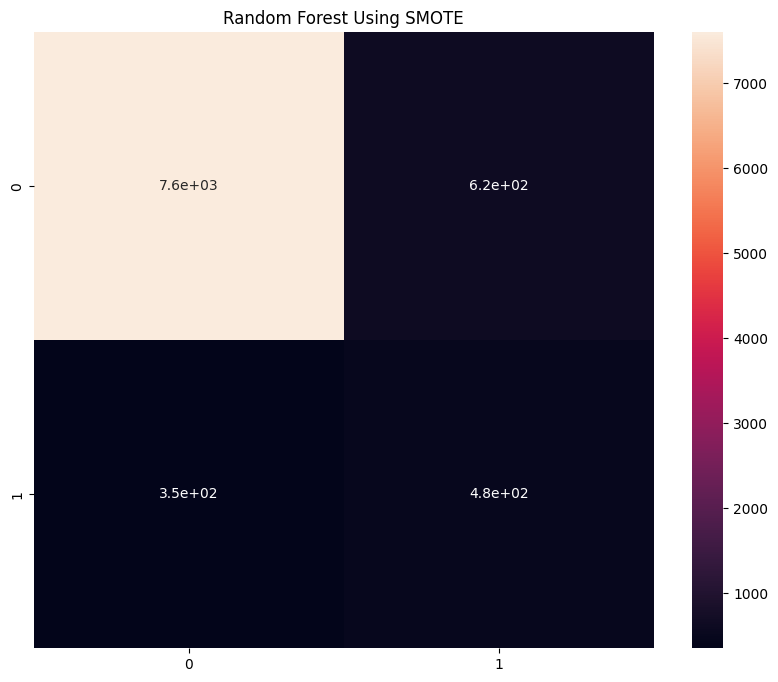

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_ovr, y_train_ovr)

y_pred = rf_clf.predict(X_test)

print(f'Accuracy of Random Forest is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("Random Forest Using SMOTE")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Decision Tree

Accuracy of Decision Tree is 0.8532566626119651



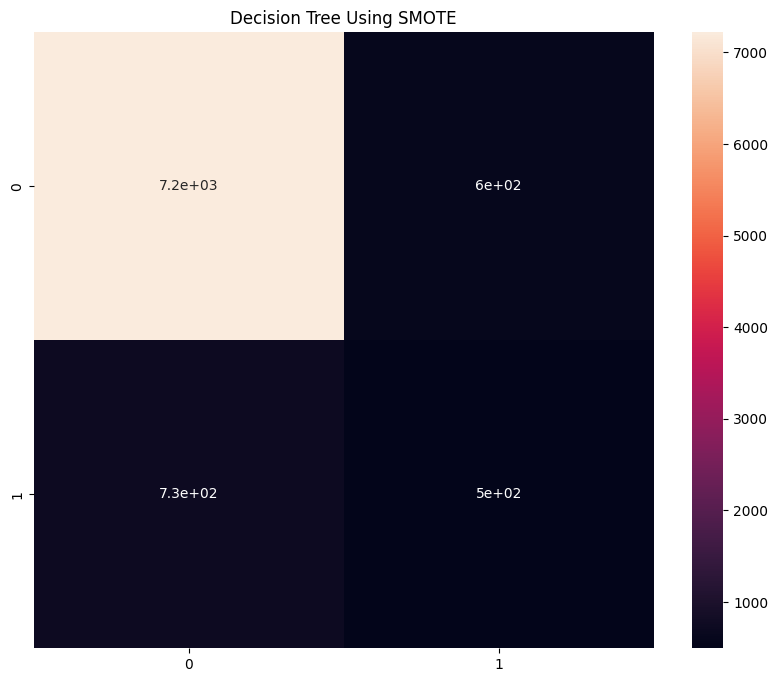

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_ovr, y_train_ovr)

y_pred = dt_clf.predict(X_test)

print(f'Accuracy of Decision Tree is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("Decision Tree Using SMOTE")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## ANN

Accuracy of ANN is 0.8217405728187548



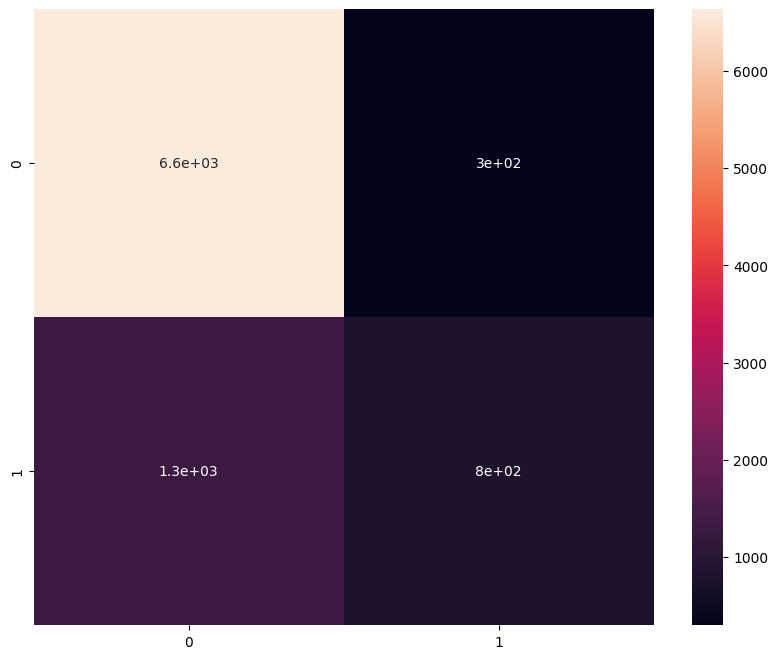

In [ ]:
ann_clf = MLPClassifier()

ann_clf.fit(X_train_ovr, y_train_ovr)

y_pred = ann_clf.predict(X_test)

print(f'Accuracy of ANN is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

# Skenario Undersampling VS SMOTE


In [ ]:
undr_ovr = pd.DataFrame()
models_acc_undr = ["0.74621928", "0.82088847", "0.54158790", "0.82514178", "0.75756144", "0.60775047"]
models_acc_ovr = ["0.77651222", "0.89439345", "0.79796528", "0.89284529", "0.85325666", "0.82174057"]
models_arr = ["KNN", "XGBoost", "SVM", "Random Forest", "Decision Tree", "ANN"]

undr_ovr['Models'] = models_arr
undr_ovr['Accuracy With Undersampling'] = models_acc_undr
undr_ovr['Accuracy With SMOTE'] = models_acc_ovr

undr_ovr


,Models,Accuracy With Undersampling,Accuracy With SMOTE
0,KNN,0.74621928,0.77651222
1,XGBoost,0.82088847,0.89439345
2,SVM,0.54158790,0.79796528
3,Random Forest,0.82514178,0.89284529
4,Decision Tree,0.75756144,0.85325666
5,ANN,0.60775047,0.82174057


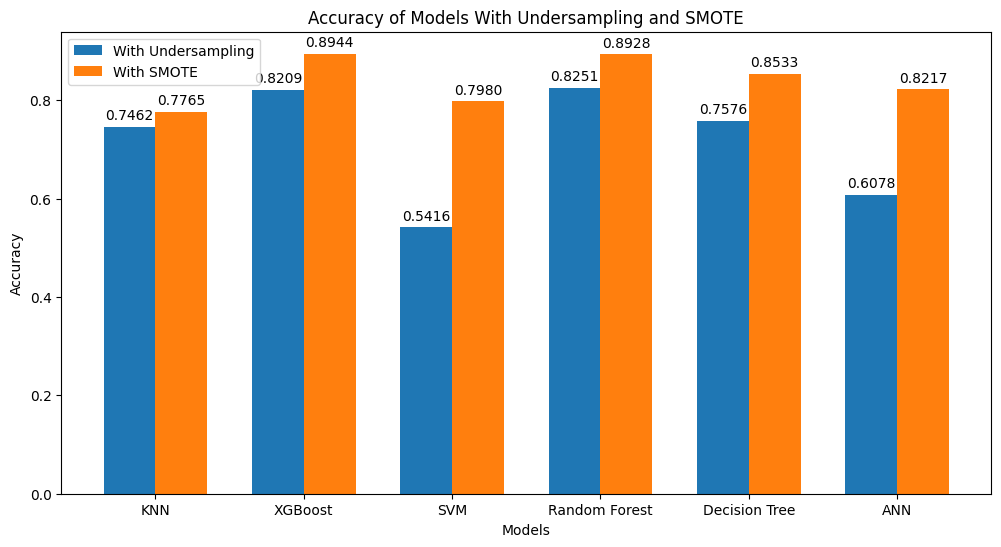

In [ ]:
undr_ovr = pd.DataFrame()
models_acc_undr = [0.74621928, 0.82088847, 0.54158790, 0.82514178, 0.75756144, 0.60775047]
models_acc_ovr = [0.77651222, 0.89439345, 0.79796528, 0.89284529, 0.85325666, 0.82174057]
models_arr = ["KNN", "XGBoost", "SVM", "Random Forest", "Decision Tree", "ANN"]

undr_ovr['Models'] = models_arr
undr_ovr['Accuracy With Undersampling'] = models_acc_undr
undr_ovr['Accuracy With SMOTE'] = models_acc_ovr

# Plotting the bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models_arr))  # The label locations

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
bar1 = ax.bar(index, undr_ovr['Accuracy With Undersampling'], bar_width, label='With Undersampling')
bar2 = ax.bar(index + bar_width, undr_ovr['Accuracy With SMOTE'], bar_width, label='With SMOTE')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models With Undersampling and SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models_arr)
ax.legend()

# Adding value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()

Berdasarkan Hasil skenario di atas, imbalance data handling yang lebih baik adalah SMOTE. Oleh karena itu, data yang akan kita lanjutkan ke skenario selanjutnya adalah data yang sudah dioversampling dengan menggunakan SMOTE

# Machine Learning Training After Normalization

## MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_ovr)

X_test_scaled = scaler.transform(X_test)

## K Nearest Neighbors

Accuracy of KNN is 0.8621032843083047



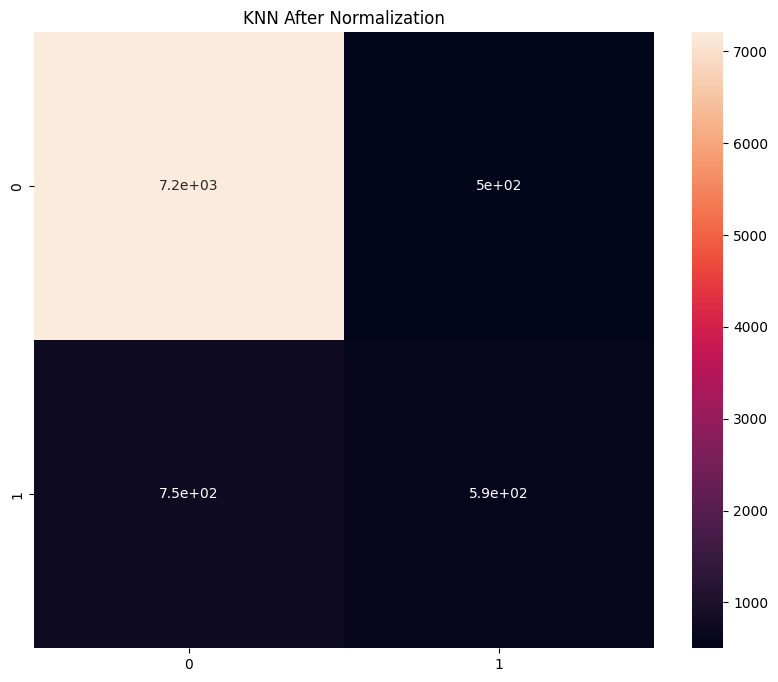

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train_ovr)

y_pred = knn_clf.predict(X_test_scaled)

print(f'Accuracy of KNN is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("KNN After Normalization")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## XGBoost

Accuracy of XGBoost is 0.8943934534999447



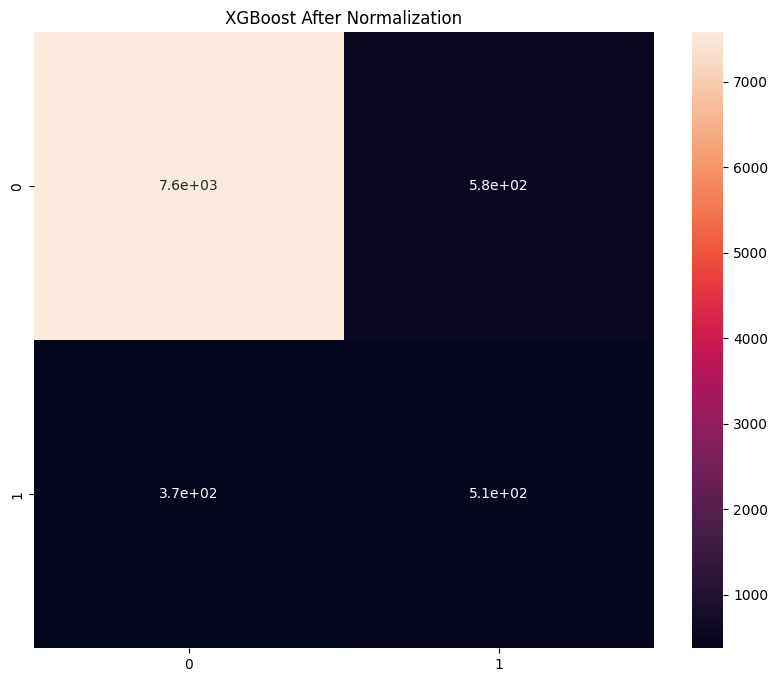

In [ ]:
xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train_scaled, y_train_ovr)

y_pred = xgb_clf.predict(X_test_scaled)

print(f'Accuracy of XGBoost is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("XGBoost After Normalization")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## SVM

Accuracy of SVM is 0.8831140108371116



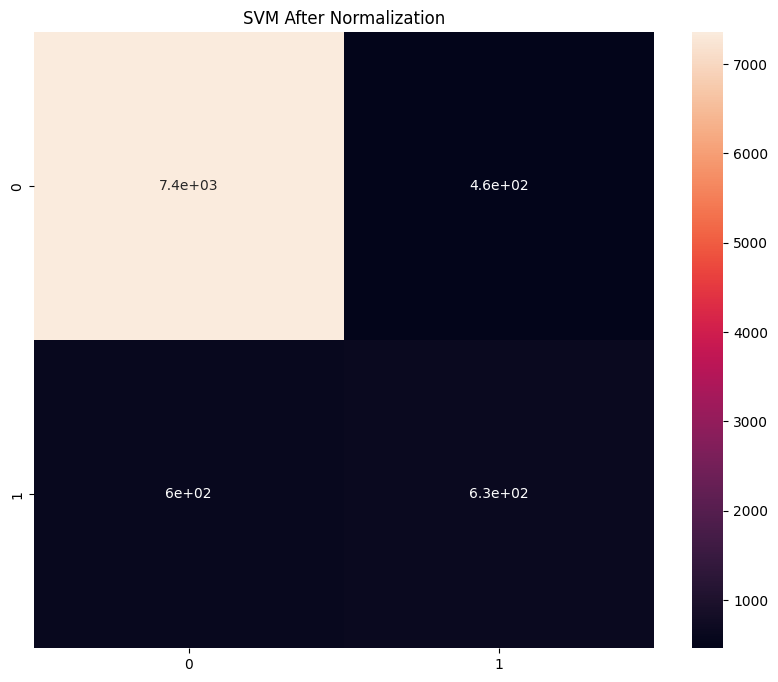

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train_ovr)

y_pred = svm_clf.predict(X_test_scaled)

print(f'Accuracy of SVM is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("SVM After Normalization")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Random Forest

Accuracy of Random Forest is 0.8920712153046555



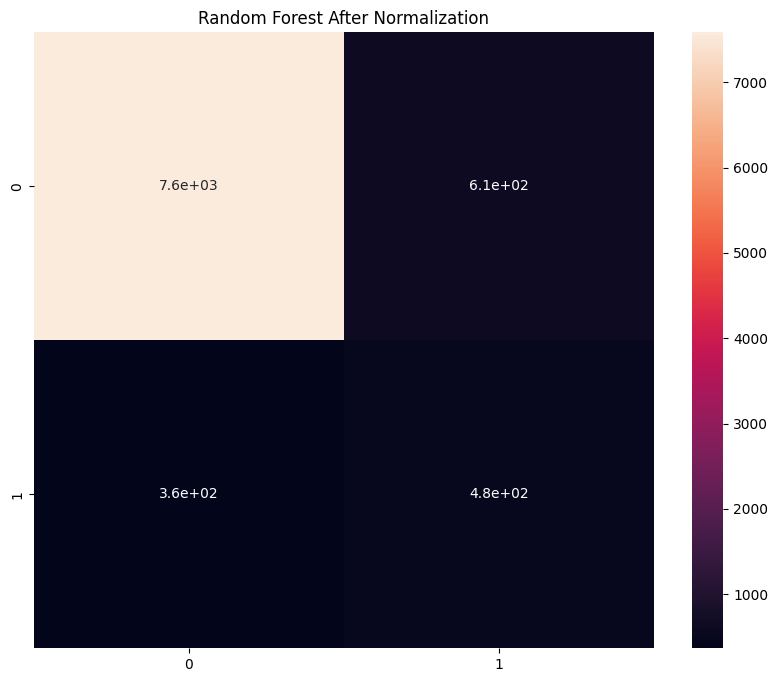

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train_ovr)

y_pred = rf_clf.predict(X_test_scaled)

print(f'Accuracy of Random Forest is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("Random Forest After Normalization")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Decision Tree

Accuracy of Decision Tree is 0.8548048214088245



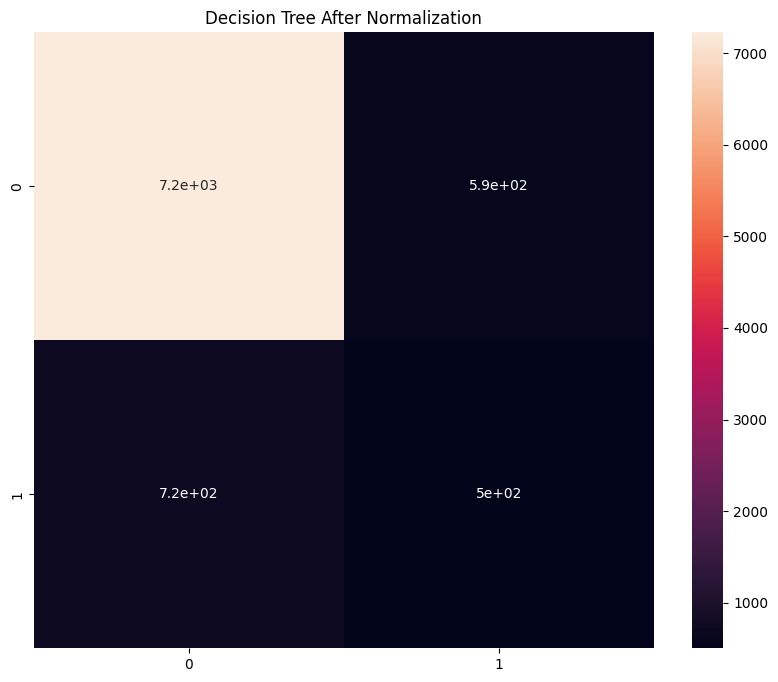

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled, y_train_ovr)

y_pred = dt_clf.predict(X_test_scaled)

print(f'Accuracy of Decision Tree is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("Decision Tree After Normalization")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## ANN

Accuracy of ANN is 0.8862103284308305



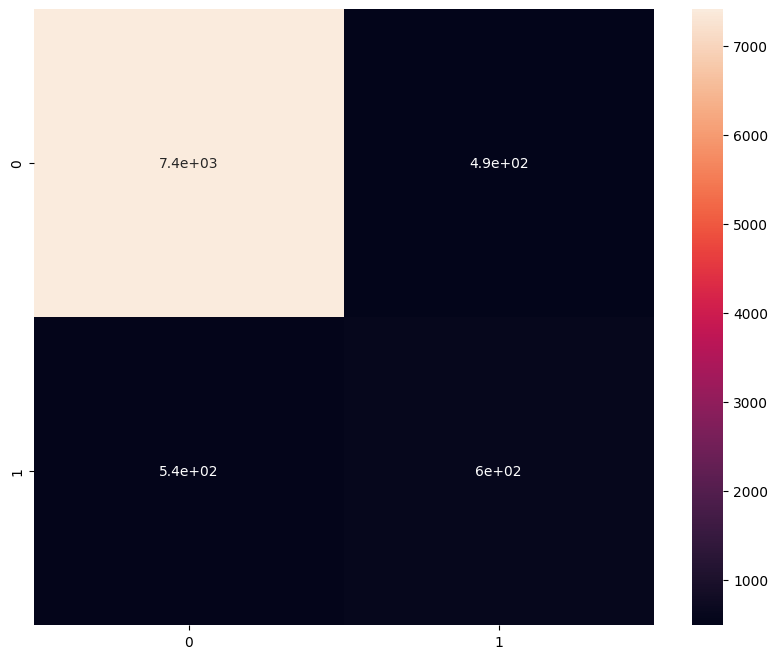

In [ ]:
ann_clf = MLPClassifier()

ann_clf.fit(X_train_scaled, y_train_ovr)

y_pred = ann_clf.predict(X_test_scaled)

print(f'Accuracy of ANN is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

# Skenario Tanpa Normalisasi VS Normalisasi  

In [ ]:
normalisasi_sum = pd.DataFrame()

models_arr = ["KNN", "XGBoost", "SVM", "Random Forest", "Decision Tree", "ANN"]

models_acc_NoNorm = ["0.77651222", "0.89439345", "0.79796528", "0.89284529", "0.85325666", "0.82174057"]

models_acc_norm = ["0.86210328", "0.89439345", "0.88311401", "0.89207122", "0.85480482", "0.88621033"]

normalisasi_sum['Models'] = models_arr
normalisasi_sum['Accuracy Without Normalization'] = models_acc_NoNorm
normalisasi_sum['Accuracy With Normalization'] = models_acc_norm

normalisasi_sum

,Models,Accuracy Without Normalization,Accuracy With Normalization
0,KNN,0.77651222,0.86210328
1,XGBoost,0.89439345,0.89439345
2,SVM,0.79796528,0.88311401
3,Random Forest,0.89284529,0.89207122
4,Decision Tree,0.85325666,0.85480482
5,ANN,0.82174057,0.88621033


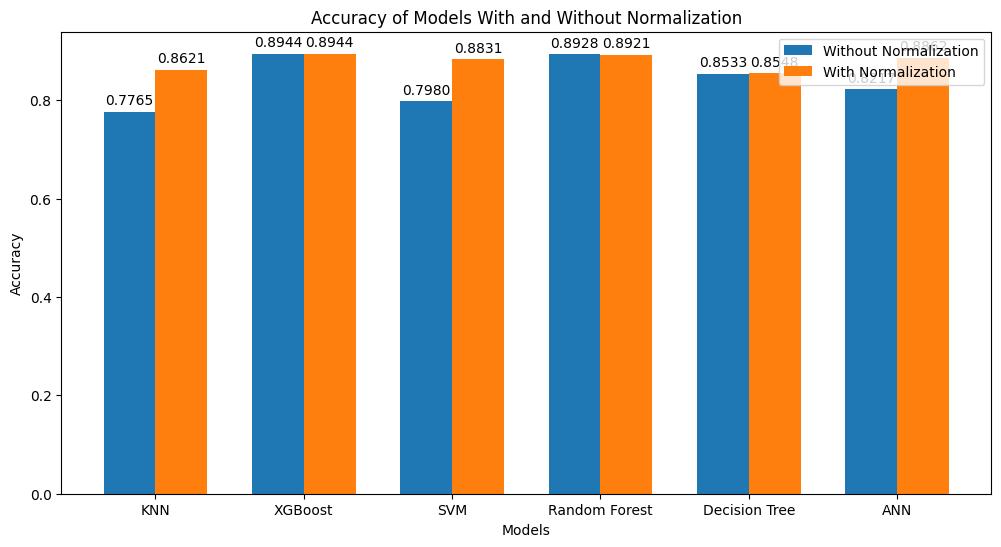

In [ ]:
normalisasi_sum = pd.DataFrame()
models_arr = ["KNN", "XGBoost", "SVM", "Random Forest", "Decision Tree", "ANN"]

models_acc_NoNorm = [0.77651222, 0.89439345, 0.79796528, 0.89284529, 0.85325666, 0.82174057]
models_acc_norm = [0.86210328, 0.89439345, 0.88311401, 0.89207122, 0.85480482, 0.88621033]

normalisasi_sum['Models'] = models_arr
normalisasi_sum['Accuracy Without Normalization'] = models_acc_NoNorm
normalisasi_sum['Accuracy With Normalization'] = models_acc_norm

# Plotting the bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models_arr))  # The label locations

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
bar1 = ax.bar(index, normalisasi_sum['Accuracy Without Normalization'], bar_width, label='Without Normalization')
bar2 = ax.bar(index + bar_width, normalisasi_sum['Accuracy With Normalization'], bar_width, label='With Normalization')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models With and Without Normalization')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models_arr)
ax.legend()

# Adding value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()

Berdasarkan Hasil skenario di atas, Akurasi yang dimiliki oleh data yang sudah dinormalisasikan lebih baik daripada yang tidak dinormalisasikan. Oleh karena itu, data yang akan digunakan pada skenario selanjutnya adalah data yang menggunakan oversampling atau SMOTE dan sudah dinormalisasi menggunakan MinMaxScaler

# Hyperparameter Tuning

## K Nearest Neighbors

In [ ]:
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the grid of hyperparameters
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train_ovr)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Evaluate the best estimator on the test data
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy score:  0.920394119487019
Test set accuracy:  0.8700652438350105


Accuracy of KNN is 0.8700652438350105



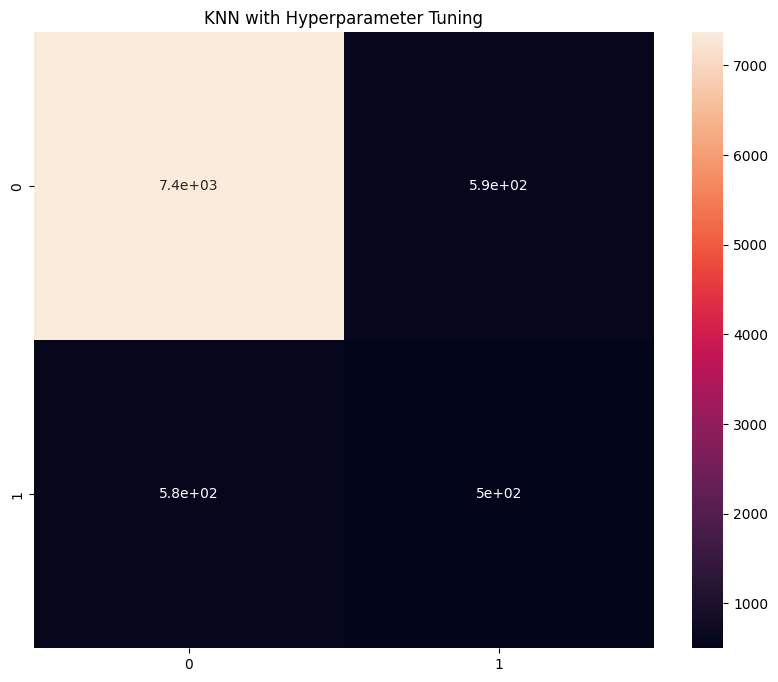

In [ ]:
y_pred = best_knn.predict(X_test_scaled)

print(f'Accuracy of KNN is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.title("KNN with Hyperparameter Tuning")
plt.show()

## XGBoost

In [ ]:
xgb_clf = xgb.XGBClassifier()

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train_ovr)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Evaluate the best estimator on the test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
Best accuracy score:  0.9149202377228651
Test set accuracy:  0.8926241291606768


Accuracy of XGBoost is 0.8926241291606768



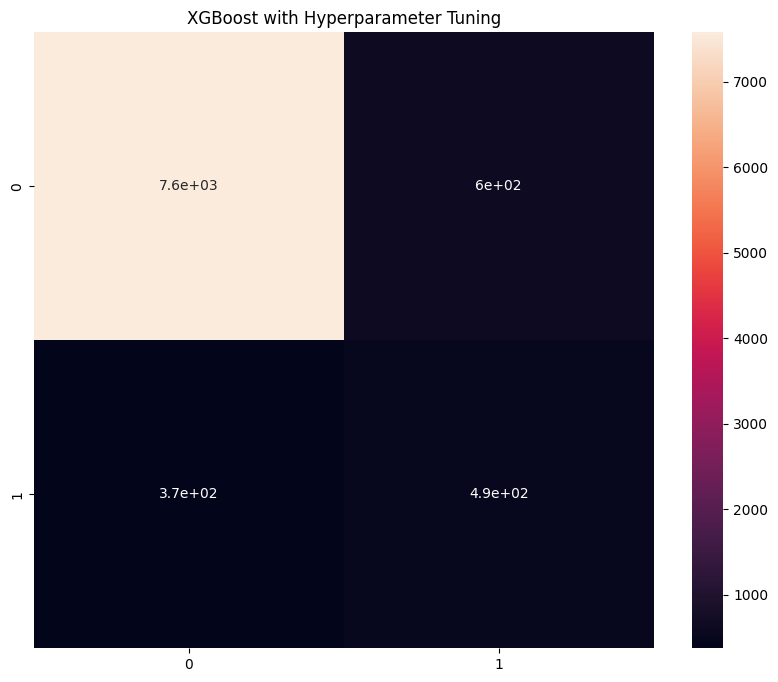

In [ ]:
y_pred = best_xgb.predict(X_test_scaled)

print(f'Accuracy of XGBoost is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.title("XGBoost with Hyperparameter Tuning")
plt.show()

## SVM

In [ ]:
# Define the Decision Tree model
svm = SVC()

# Define the parameter grid
param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
}

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train_ovr)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Set Score:", test_score)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'kernel': 'poly'}
Best Cross-Validation Score: 0.9030976082091756
Test Set Score: 0.8856574145748093


Accuracy of SVM is 0.8856574145748093



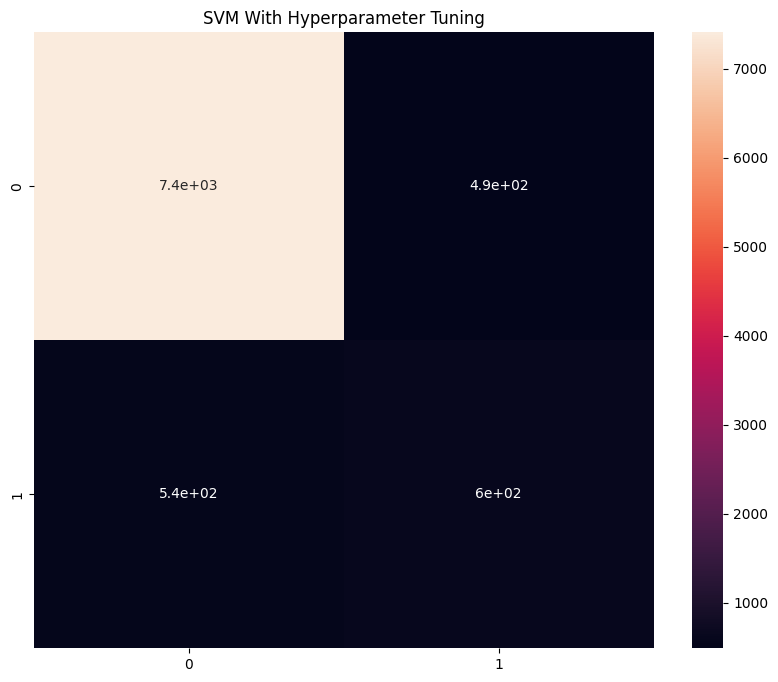

In [ ]:
y_pred = best_model.predict(X_test_scaled)

print(f'Accuracy of SVM is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("SVM With Hyperparameter Tuning")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Random Forest

In [ ]:
# Define the Random Forest model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train_ovr)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Set Score:", test_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_features': 'log2', 'n_estimators': 200}
Best Cross-Validation Score: 0.9279480763215513
Test Set Score: 0.8939511224151278


Accuracy of Random Forest is 0.8939511224151278



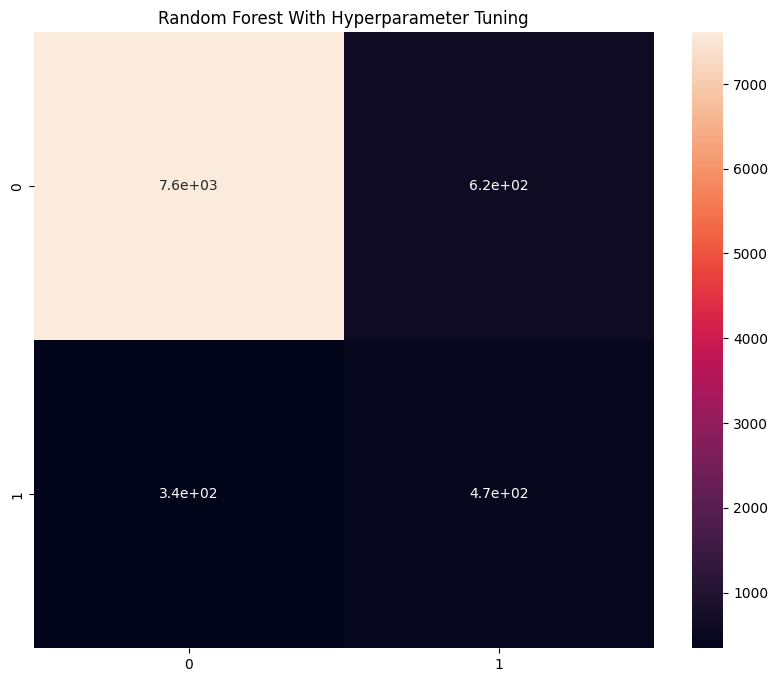

In [ ]:
y_pred = best_model.predict(X_test_scaled)

print(f'Accuracy of Random Forest is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("Random Forest With Hyperparameter Tuning")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## Decision Tree

In [ ]:
# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train_ovr)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Set Score:", test_score)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best Cross-Validation Score: 0.9068982104895555
Test Set Score: 0.8701758266062147


Accuracy of Decision Tree is 0.8701758266062147



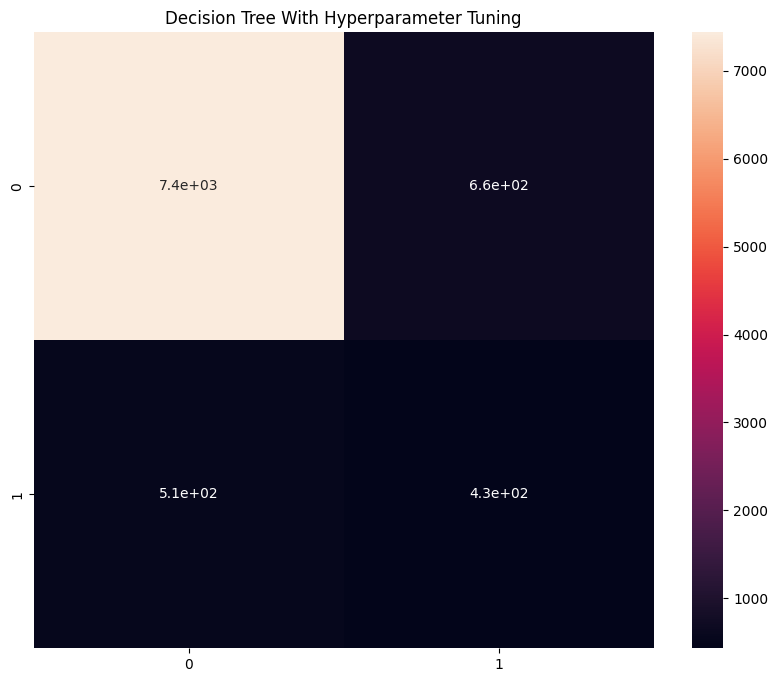

In [ ]:
y_pred = best_model.predict(X_test_scaled)

print(f'Accuracy of Decision Tree is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("Decision Tree With Hyperparameter Tuning")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## ANN

In [ ]:
# Define the MLPClassifier
mlp = MLPClassifier()

# Define the parameter grid
param_grid = {
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.3]
}

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train_ovr)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Set Score:", test_score)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'learning_rate_init': 0.001}
Best Cross-Validation Score: 0.9047242627124943
Test Set Score: 0.8879796527700984


Accuracy of ANN is 0.8879796527700984



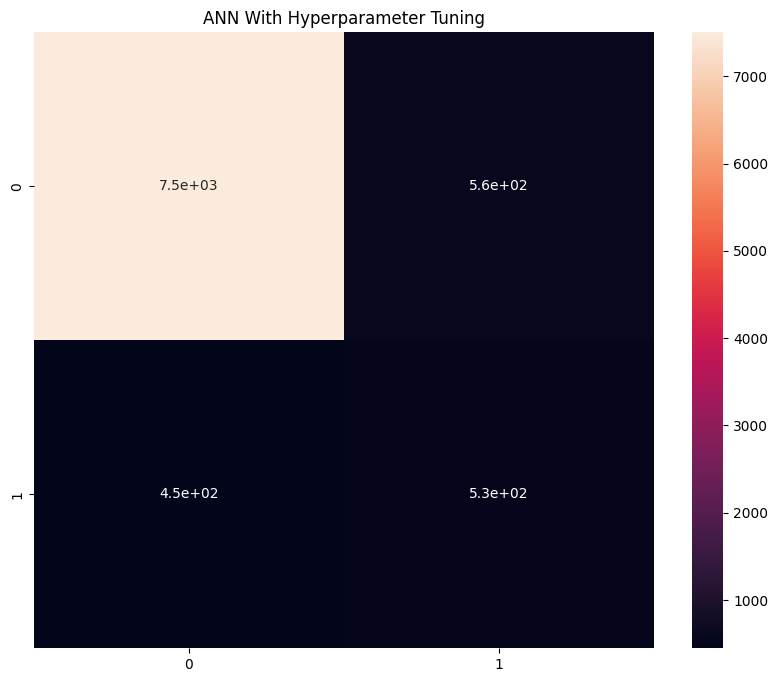

In [ ]:
y_pred = best_model.predict(X_test_scaled)

print(f'Accuracy of ANN is {accuracy_score(y_pred, y_test)}')
print()

plt.figure(figsize=[10, 8])
plt.title("ANN With Hyperparameter Tuning")
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

# Skenario Without Tuning VS With Tuning

In [ ]:
tuning_df = pd.DataFrame()
models_acc = ["0.86210328", "0.89439345", "0.88311401", "0.89207122", "0.85480482", "0.88621033"]
models_acc_ovr = ["0.87006524", "0.89262412", "0.88565741", "0.89395112", "0.87017583", "0.88797965"]
models_arr = ["KNN", "XGBoost", "SVM", "Random Forest", "Decision Tree", "ANN"]

tuning_df['Models'] = models_arr
tuning_df['Accuracy Without Tuning'] = models_acc
tuning_df['Accuracy With Tuning'] = models_acc_ovr

tuning_df

,Models,Accuracy Without Tuning,Accuracy With Tuning
0,KNN,0.86210328,0.87006524
1,XGBoost,0.89439345,0.89262412
2,SVM,0.88311401,0.88565741
3,Random Forest,0.89207122,0.89395112
4,Decision Tree,0.85480482,0.87017583
5,ANN,0.88621033,0.88797965


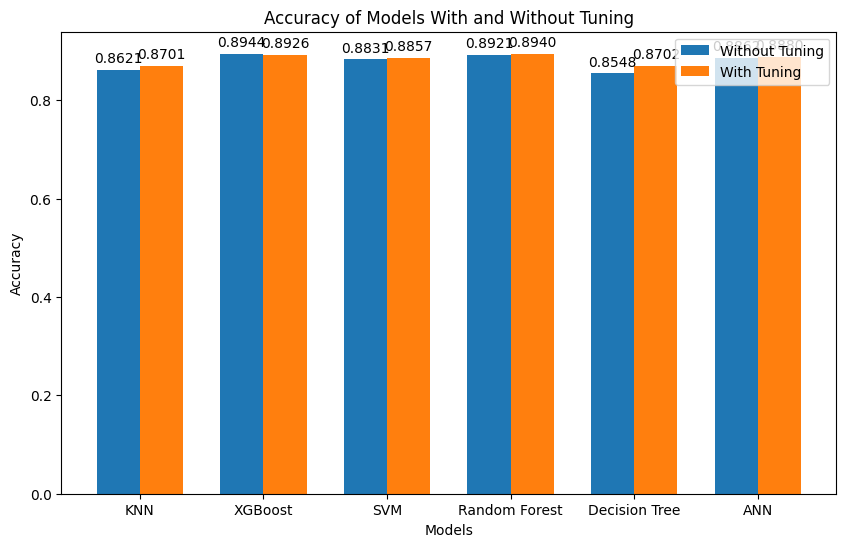

In [ ]:
tuning_df = pd.DataFrame()
models_acc = [0.86210328, 0.89439345, 0.88311401, 0.89207122, 0.85480482, 0.88621033]
models_acc_ovr = [0.87006524, 0.89262412, 0.88565741, 0.89395112, 0.87017583, 0.88797965]
models_arr = ["KNN", "XGBoost", "SVM", "Random Forest", "Decision Tree", "ANN"]

tuning_df['Models'] = models_arr
tuning_df['Accuracy Without Tuning'] = models_acc
tuning_df['Accuracy With Tuning'] = models_acc_ovr

# Plotting the bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models_arr))  # The label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars
bar1 = ax.bar(index, tuning_df['Accuracy Without Tuning'], bar_width, label='Without Tuning')
bar2 = ax.bar(index + bar_width, tuning_df['Accuracy With Tuning'], bar_width, label='With Tuning')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models With and Without Tuning')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models_arr)
ax.legend()

# Adding value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()

# Summary

Berdasarkan Hasil analisis di atas, dapat kita simpulkan bahwa model Machine Learning Random Forest merupakan model terbaik yang dapat digunakan pada dataset ini karena memiliki akurasi paling tinggi di antara model-model lainnya yaitu sebesar 89.39%